# import

**packages**

In [2]:
import pandas as pd       # Data Analysis
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from sklearn.preprocessing import LabelEncoder      # Model Pre-Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error # Model Performance Analysis
from sklearn.metrics import r2_score


from catboost import CatBoostRegressor    # Regression Models
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from IPython.display import display, HTML # Display Preferences
import os



**data**

In [16]:
# Import Raw Data
data_raw = pd.read_csv('data/Ames_Housing_Price_Data.csv')
data_raw = data_raw.drop(columns='Unnamed: 0')


In [7]:
os.stat('data/Ames_Housing_Price_Data.csv').st_size

871442

In [8]:
871442/1024

851.017578125

**display**

In [12]:
# Display Max Column and Rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Code Block Output: Enable 100px + scrolling
HTML("""
<style>
.output_scroll {
    box-sizing: border-box;
    display: block;
    -webkit-box-sizing: border-box;
    -moz-box-sizing: border-box;
    max-height: 100px;
    overflow: auto;
}
</style>
""")

**project purpose**

Home's are most american's largest asset, rising in value as years pass in their working years. While some have developed professions by developing or flipping homes, possibly the majority of homes are simply lived-in, or if not, rented out directly by their landlord.

This dataset could help answer questions, at least for the people in Ames, on When to buy, when to sell, which investments might return positively over the years, and what to focus on before listing your home.

## Let's Understand Ames

**2580 Homes Sold, 2580 Rows of Data**

In [271]:
len(data_raw)

2580

### Business Insight 1: 
- There are no duplicates. No Flips. 
- This might be an opportunity or a warning. 
- This also means buyers are holding or renting

In [272]:
data_raw['PID'].duplicated().value_counts()

False    2579
True        1
Name: PID, dtype: int64

*It's a duplicate, not a flip which we can tell from the Sale Price and SoldDate*

In [17]:
duplicated_rows = data_raw[data_raw['PID'].duplicated(keep=False)]
duplicated_rows


PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
1816  909276070       1717     194000          50       RL         80.0   
1817  909276070       1717     194000          50       RL         80.0   

      LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
1816    12400   Pave   NaN      Reg         HLS    AllPub    Inside       Mod   
1817    12400   Pave   NaN      Reg         HLS    AllPub    Inside       Mod   

     Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
1816      Crawfor       Norm       Norm     1Fam     1.5Fin            5   
1817      Crawfor       Norm       Norm     1Fam     1.5Fin            5   

      OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
1816            6       1940          1950     Gable  CompShg     Wd Sdng   
1817            6       1940          1950     Gable  CompShg     Wd Sdng   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
1816     Wd Sdng       None         0.0        TA        TA     CBlock   
1817     Wd Sdng       None         0.0        TA        TA     CBlock   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
1816       Gd       TA           Mn          BLQ       602.0          Unf   
1817       Gd       TA           Mn          BLQ       602.0          Unf   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
1816         0.0      299.0        901.0    GasA        TA          Y   
1817         0.0      299.0        901.0    GasA        TA          Y   

     Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
1816      SBrkr      1125       592             0           0.0           0.0   
1817      SBrkr      1125       592             0           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1816         1         1             2             1          TA   
1817         1         1             2             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1816             7        Typ           1          Gd     Attchd       1940.0   
1817             7        Typ           1          Gd     Attchd       1940.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1816          Unf         1.0       410.0         TA         TA          Y   
1817          Unf         1.0       410.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1816           0            0              0          0          113   
1817           0            0              0          0          113   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1816         0    NaN   NaN         NaN        0       2    2006      WD    
1817         0    NaN   NaN         NaN        0       2    2006      WD    

     SaleCondition  
1816        Normal  
1817        Normal

**Missing Values**

In [274]:
missing_values = data_raw.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_values_df = pd.DataFrame(missing_values, columns=['missing_values'])
missing_values_df['data_type'] = data_raw[missing_values.index].dtypes

missing_values_df.sort_values(by='data_type')


missing_values data_type
LotFrontage              462   float64
MasVnrArea                14   float64
GarageArea                 1   float64
GarageCars                 1   float64
BsmtFinSF1                 1   float64
GarageYrBlt              129   float64
BsmtFinSF2                 1   float64
BsmtUnfSF                  1   float64
TotalBsmtSF                1   float64
BsmtFullBath               2   float64
BsmtHalfBath               2   float64
PoolQC                  2571    object
GarageCond               129    object
GarageQual               129    object
GarageFinish             129    object
GarageType               127    object
Electrical                 1    object
Fence                   2055    object
BsmtFinType2              70    object
BsmtFinType1              69    object
BsmtExposure              71    object
BsmtCond                  69    object
BsmtQual                  69    object
MasVnrType                14    object
Alley                   2412    object
FireplaceQu             1241    object
MiscFeature             2483    object

*Explore Each Column with missing Values*

In [276]:
# Lot Frontage: NaN Probably means 0 (0.0)
# MasVnrArea:   NaN Probably means 0 (0.0)
# GarageArea:   NaN Probably means 0 (0.0)
# BsmtFinSF1:   NaN Probably means 0 (0.0)
# GarageYrBlt:  NaN Probably means 0 (0000)
# BsmtUnfSF:    NaN Probably means 0 (0.0)
# TotalBsmtSF:  NaN Probably means 0 (0.0)
# BsmtFullBath: NaN Probably means 0 (0.0)
# BsmtHalfBath: NaN Probably means 0 (0.0)
# PoolQC:       NaN Probably means 'No Pool'. Will Replace with none
# GarageCond:   NaN Probably means 'No Garage'. Will Replace with none
# GarageQual:   NaN Probably means 'No Garage'. Will Replace with none
# GarageFinish: NaN Probably means 'No Garage'. Will Replace with none
# GarageType:   NaN Probably means 'No Garage'. Unusual because 2 less.
# Fence:        NaN Probably means 'No Fence'. Will Replace with none
# BsmtFinType2: NaN Probably means 'No Bsmt'. Will Replace with none
# BsmtFinType1: NaN Probably means 'No Bsmt'. Will Replace with none
# BsmtExposure: NaN Probably means 'No Bsmt'. Will Replace with none
# BsmtCond:     NaN Probably means 'No Bsmt'. Will Replace with none
# BsmtQual:     NaN Probably means 'No Bsmt'. Will Replace with none
# Alley:        NaN Probably means 'No Alley'. Will Replace with none
# FireplaceQu:  NaN Probably means 'No Fireplace'. Will Replace with none
# MiscFeature:  NaN Probably means 'No MiscFeature'. Will Replace with noneb


In [277]:
#missing values
for col in data_raw.columns:
    if data_raw[col].isnull().sum() > 0:     # are there are missing values?
        if data_raw[col].dtype == 'object':  # if the column is of object type fill 'Unk'
            data_raw[col].fillna('Unk', inplace=True)
        elif data_raw[col].dtype in ['int64', 'float64']:  # if the column is of numeric type
            data_raw[col].fillna(0, inplace=True)          # fill with 0


In [413]:
data_raw.MiscFeature.value_counts()

Unk     2483
Shed      88
Gar2       5
Othr       3
TenC       1
Name: MiscFeature, dtype: int64

### Business Insight 2: 
- Data Set From January 2006 to July 2010
- 4 Years and 6mo. 
- The 2007-08 Financial Crises Started within this period

In [19]:
data_raw['SoldDate'] = (data_raw['YrSold'].astype(str) + '.' + data_raw['MoSold'].apply(lambda x: f'{x:02d}')).astype(float)


In [279]:
data_raw['SoldDate'].min()

2006.01

In [280]:
data_raw['SoldDate'].max()

2010.07

In [20]:
print(data_raw['SoldDate'].max()-data_raw['SoldDate'].min(),'years')

4.059999999999945 years


*There doesn't seem to be much impact on annual sales. 2010 looks low, as we know, becuase it had less sales*

<Axes: >

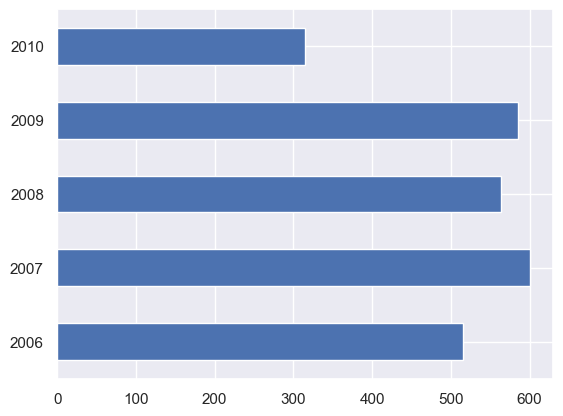

In [283]:
data_raw.YrSold.value_counts().sort_index().plot.barh()


**Business Insight 3: We still Manage to See a Very Consistent Trend**

In [284]:
data_raw.groupby('YrSold')['MoSold'].value_counts().sort_index()

YrSold  MoSold
2006    1          15
        2          21
        3          40
        4          42
        5          67
        6          89
        7          98
        8          33
        9          29
        10         39
        11         24
        12         19
2007    1          28
        2          24
        3          47
        4          42
        5          84
        6          96
        7          95
        8          62
        9          30
        10         36
        11         31
        12         25
2008    1          21
        2          25
        3          33
        4          57
        5          76
        6         101
        7          99
        8          44
        9          32
        10         26
        11         27
        12         23
2009    1          16
        2          25
        3          43
        4          45
        5          63
        6          98
        7         100
        8          54
        9        

**The monthly Trend Looks Consistent As Well**
*Stopped Recording Sometime in June 2010*

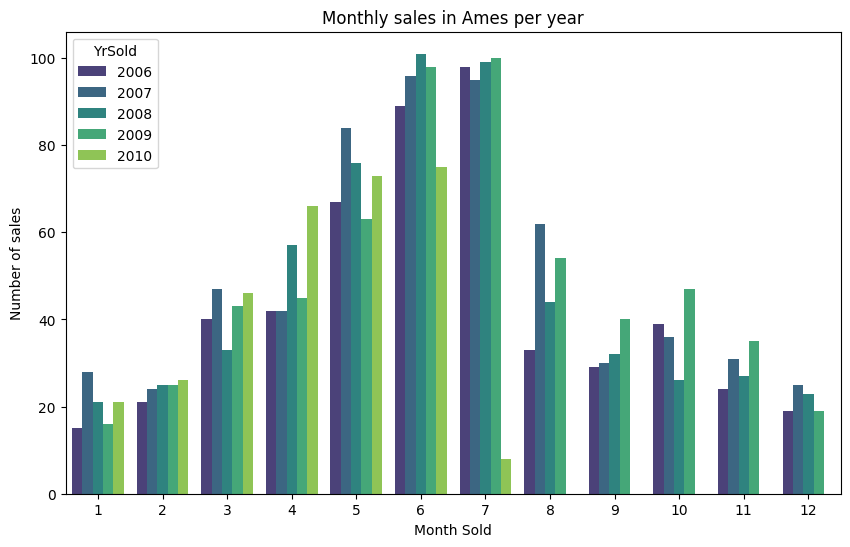

In [22]:
import seaborn as sns

# Create a new DataFrame with the counts
df = data_raw.groupby(['YrSold', 'MoSold']).size().reset_index(name='Counts')

# Create the bar plot
plt.figure(figsize=(10, 6))  # Increase the size of the plot
sns.barplot(x='MoSold', y='Counts', hue='YrSold', data=df, palette='viridis')

plt.title('Monthly sales in Ames per year')  # Add a title
plt.xlabel('Month Sold')  # Label the x-axis
plt.ylabel('Number of sales')  # Label the y-axis
plt.show()


**Infact, it looks like prices went up most months**

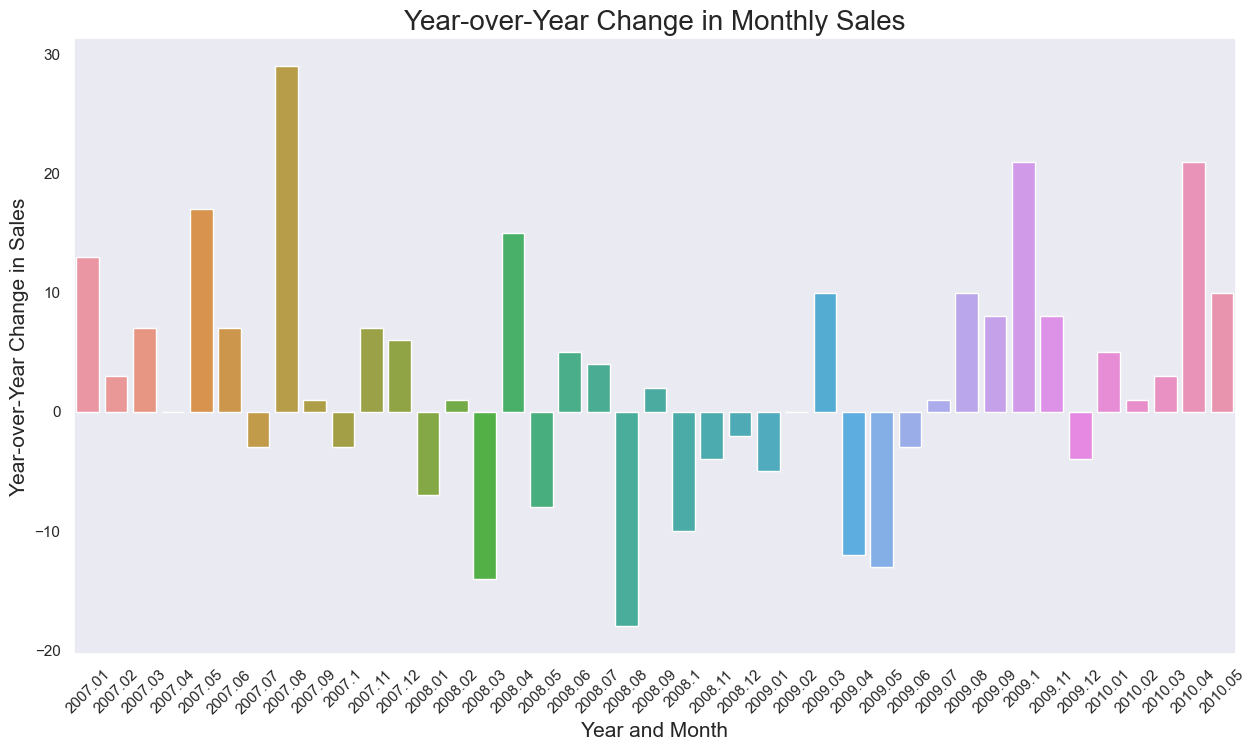

In [23]:
# Ensure seaborn's beautiful styling is applied
sns.set()

# Compute the year over year change
monthly_sales = data_raw.groupby('SoldDate').size()
yoy_change = monthly_sales.diff(12)
yoy_change = yoy_change.drop([(2010.06),(2010.07),(2006.01),
                              (2006.02),(2006.03),(2006.04),
                              (2006.05),(2006.06),(2006.07),
                              (2006.08),(2006.09),(2006.10),
                              (2006.11),(2006.12)])

# Convert the series to DataFrame for better plotting
yoy_change_df = yoy_change.to_frame().reset_index()
yoy_change_df.columns = ['YearMonth', 'SalesChange']

# Create the plot
plt.figure(figsize=(15,8))
sns.barplot(data=yoy_change_df, x='YearMonth', y='SalesChange')
plt.title('Year-over-Year Change in Monthly Sales', fontsize=20)
plt.xlabel('Year and Month', fontsize=15)
plt.ylabel('Year-over-Year Change in Sales', fontsize=15)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


In [24]:
positive_count = yoy_change_df[yoy_change_df['SalesChange'] > 0].shape[0]
negative_count = yoy_change_df[yoy_change_df['SalesChange'] < 0].shape[0]

print(f"Positive changes: {positive_count}")
print(f"Negative changes: {negative_count}")


Positive changes: 25
Negative changes: 14


**We see a seasonlity trend:** Number of Houses Sold Decomposition

In [25]:
# Seasonal Decomposition

# Group by year and month, calculate the count of houses sold, and reset index
houses_sold_per_month = (
    data_raw
    .groupby(['YrSold', 'MoSold'])
    .size()
    .reset_index()
    .rename(columns={0: "Count"})
    .assign(MonthYear=lambda x: x['YrSold'].astype(str) + '.' + x['MoSold'].astype(str))
)

# Perform seasonal decomposition
seasonal_decomposition = sm.tsa.seasonal_decompose(houses_sold_per_month['Count'], model='additive', period=12)



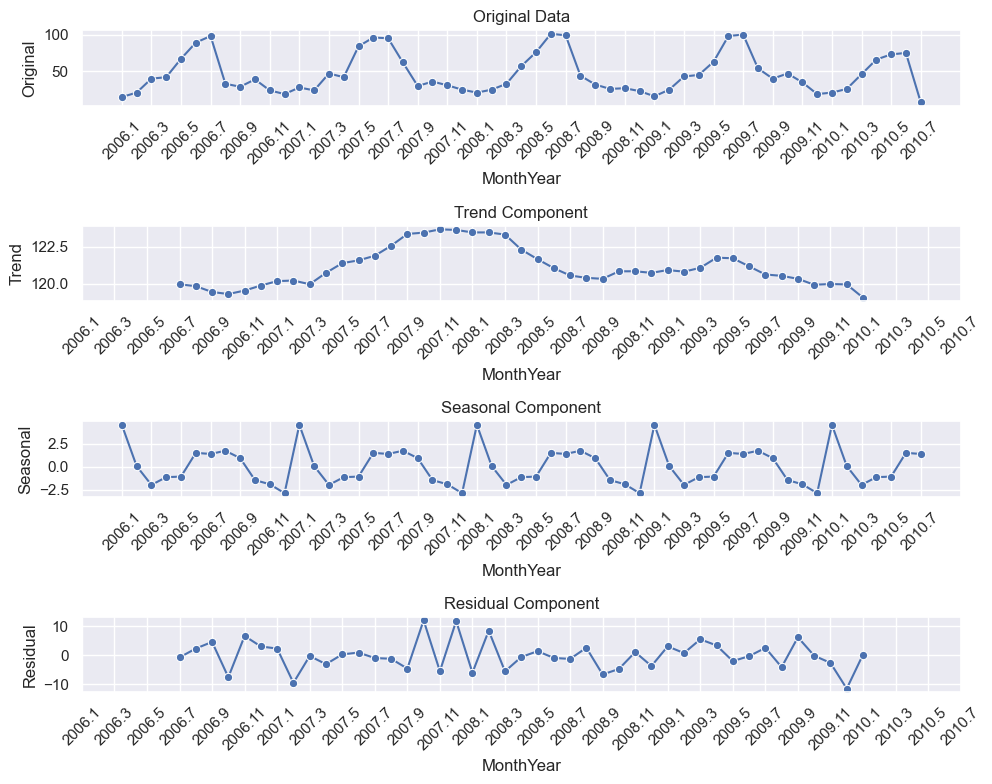

In [38]:
# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 8))

# Create list of titles and data
titles = ['Original Data', 'Trend Component', 'Seasonal Component', 'Residual Component']
data = [houses_sold_per_month['Count'], seasonal_decomposition.trend, seasonal_decomposition.seasonal, seasonal_decomposition.resid]

# Loop through each axes and plot the data with title
for ax, title, dat in zip(axs, titles, data):
    sns.lineplot(x=houses_sold_per_month['MonthYear'], y=dat, ax=ax, color='b', marker='o', linestyle='-', linewidth=1.5)
    ax.set_title(title)
    ax.set_ylabel(title.split(' ')[0])
    ax.set_xticks(houses_sold_per_month['MonthYear'][::2])  # Show every 6th month to avoid cluttering
    ax.xaxis.set_tick_params(rotation=45)  # Rotate X-axis labels for better readability

plt.tight_layout()
plt.show()


In [ ]:
# Good to know:
# Average Days On Market
# Is Sold Date the In-Contract, or Closed date? 
# Typically there is a 3mo difference. 
## Without this info, seasonality isn't useful information.
## Once we do find out though, this information will become useful so we will dive deeper


**This would encourage us to llist 4-6mo prior before for peak. But does this tell the whole story**

*Let's see if all the neighborhoods follow these timing trends?, or one is outweighing the rest*

In [290]:
data_raw.Neighborhood.nunique()

28

# Seasonality
- **Original Data:** This plot shows the original price per square foot data over time.
- **Trend Component:** The trend component represents the underlying long-term trend in the data, excluding any seasonality. It helps identify the overall pattern or direction of the data.
- **Seasonal Component:** The seasonal component shows the repetitive patterns that occur within each year. It captures the seasonality in the data, such as monthly or yearly fluctuations.
- **Residual Component:** The residual component represents the random or unexplained part of the data after removing the trend and seasonal components. It helps identify any irregularities or noise in the data.


**Price per Sqft Seasonality**

In [30]:
# Create a new column for price per square foot
data_raw['price_per_sqft'] = data_raw['SalePrice'] / data_raw['GrLivArea']



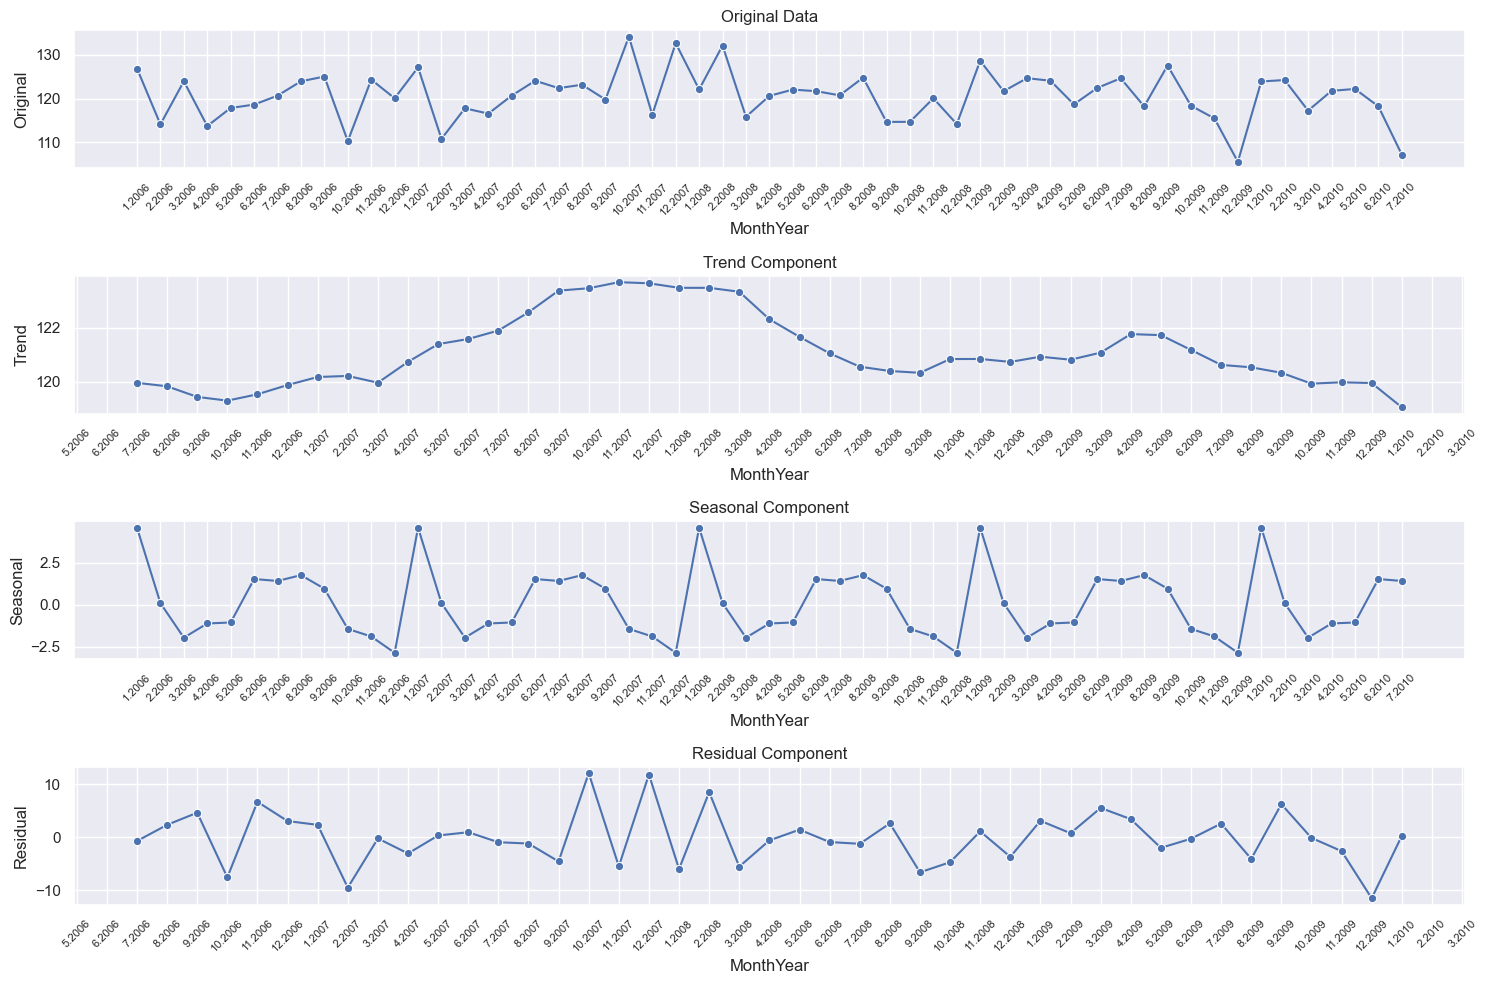

In [35]:
import seaborn as sns

# Group by year and month, calculate the average price per square foot, and reset index
avg_price_per_sqft = (
    data_raw
    .groupby(['YrSold', 'MoSold'])['price_per_sqft']
    .mean()
    .reset_index()
    .assign(MonthYear=lambda x: x['MoSold'].astype(str) + '.' + x['YrSold'].astype(str))
)

# Perform seasonal decomposition
seasonal_decomposition = sm.tsa.seasonal_decompose(avg_price_per_sqft['price_per_sqft'],model='additive', period=12)


# Create subplots with larger size
fig, axs = plt.subplots(4, 1, figsize=(15, 10))  # Adjust size as needed

# Create list of titles and data
titles = ['Original Data', 'Trend Component', 'Seasonal Component', 'Residual Component']
data = [avg_price_per_sqft['price_per_sqft'], seasonal_decomposition.trend, seasonal_decomposition.seasonal, seasonal_decomposition.resid]

# Loop through each axes and plot the data with title
for ax, title, dat in zip(axs, titles, data):
    sns.lineplot(x='MonthYear', y=dat, data=avg_price_per_sqft, ax=ax, color='b', marker='o', linestyle='-')
    ax.set_title(title)
    ax.set_ylabel(title.split(' ')[0])
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    ax.xaxis.set_tick_params(labelsize=8)  # Adjust font size as needed

plt.tight_layout()
plt.show()


**Let's look at yearly trends**

In [28]:
yearly_sales_neighborhood = data_raw.groupby(['YrSold','Neighborhood']).size().reset_index(name='SalesCount')
yearly_sales_neighborhood


YrSold Neighborhood  SalesCount
0      2006      Blmngtn           7
1      2006       BrDale           8
2      2006      BrkSide          15
3      2006      ClearCr           7
4      2006      CollgCr          48
5      2006      Crawfor          17
6      2006      Edwards          35
7      2006      Gilbert          29
8      2006       Greens           4
9      2006      GrnHill           1
10     2006       IDOTRR          15
11     2006      Landmrk           1
12     2006      MeadowV           7
13     2006      Mitchel          20
14     2006        NAmes          88
15     2006      NPkVill           3
16     2006       NWAmes          25
17     2006      NoRidge          15
18     2006      NridgHt          21
19     2006      OldTown          45
20     2006        SWISU          11
21     2006       Sawyer          37
22     2006      SawyerW          16
23     2006      Somerst          20
24     2006      StoneBr           9
25     2006       Timber           8
26     2006      Veenker           4
27     2007      Blmngtn           3
28     2007      Blueste           2
29     2007       BrDale           5
30     2007      BrkSide          24
31     2007      ClearCr           9
32     2007      CollgCr          53
33     2007      Crawfor          31
34     2007      Edwards          33
35     2007      Gilbert          32
36     2007       Greens           1
37     2007      GrnHill           1
38     2007       IDOTRR          23
39     2007      MeadowV           8
40     2007      Mitchel          26
41     2007        NAmes         101
42     2007      NPkVill           3
43     2007       NWAmes          29
44     2007      NoRidge          15
45     2007      NridgHt          28
46     2007      OldTown          41
47     2007        SWISU           4
48     2007       Sawyer          35
49     2007      SawyerW          20
50     2007      Somerst          37
51     2007      StoneBr          12
52     2007       Timber          15
53     2007      Veenker           9
54     2008      Blmngtn           5
55     2008      Blueste           2
56     2008       BrDale           7
57     2008      BrkSide          30
58     2008      ClearCr          11
59     2008      CollgCr          54
60     2008      Crawfor          19
61     2008      Edwards          40
62     2008      Gilbert          26
63     2008       IDOTRR          22
64     2008      MeadowV           7
65     2008      Mitchel          19
66     2008        NAmes          80
67     2008      NPkVill           2
68     2008       NWAmes          28
69     2008      NoRidge          14
70     2008      NridgHt          23
71     2008      OldTown          51
72     2008        SWISU           8
73     2008       Sawyer          24
74     2008      SawyerW          25
75     2008      Somerst          36
76     2008      StoneBr          10
77     2008       Timber          14
78     2008      Veenker           7
79     2009      Blmngtn           6
80     2009      Blueste           4
81     2009       BrDale           6
82     2009      BrkSide          23
83     2009      ClearCr           5
84     2009      CollgCr          60
85     2009      Crawfor          19
86     2009      Edwards          38
87     2009      Gilbert          41
88     2009       Greens           1
89     2009       IDOTRR          10
90     2009      MeadowV           5
91     2009      Mitchel          22
92     2009        NAmes          88
93     2009      NPkVill          10
94     2009       NWAmes          31
95     2009      NoRidge          13
96     2009      NridgHt          38
97     2009      OldTown          49
98     2009        SWISU           9
99     2009       Sawyer          21
100    2009      SawyerW          34
101    2009      Somerst          32
102    2009      StoneBr           6
103    2009       Timber          11
104    2009      Veenker           3
105    2010      Blmngtn           2
106    2010      Blueste           2
107    20

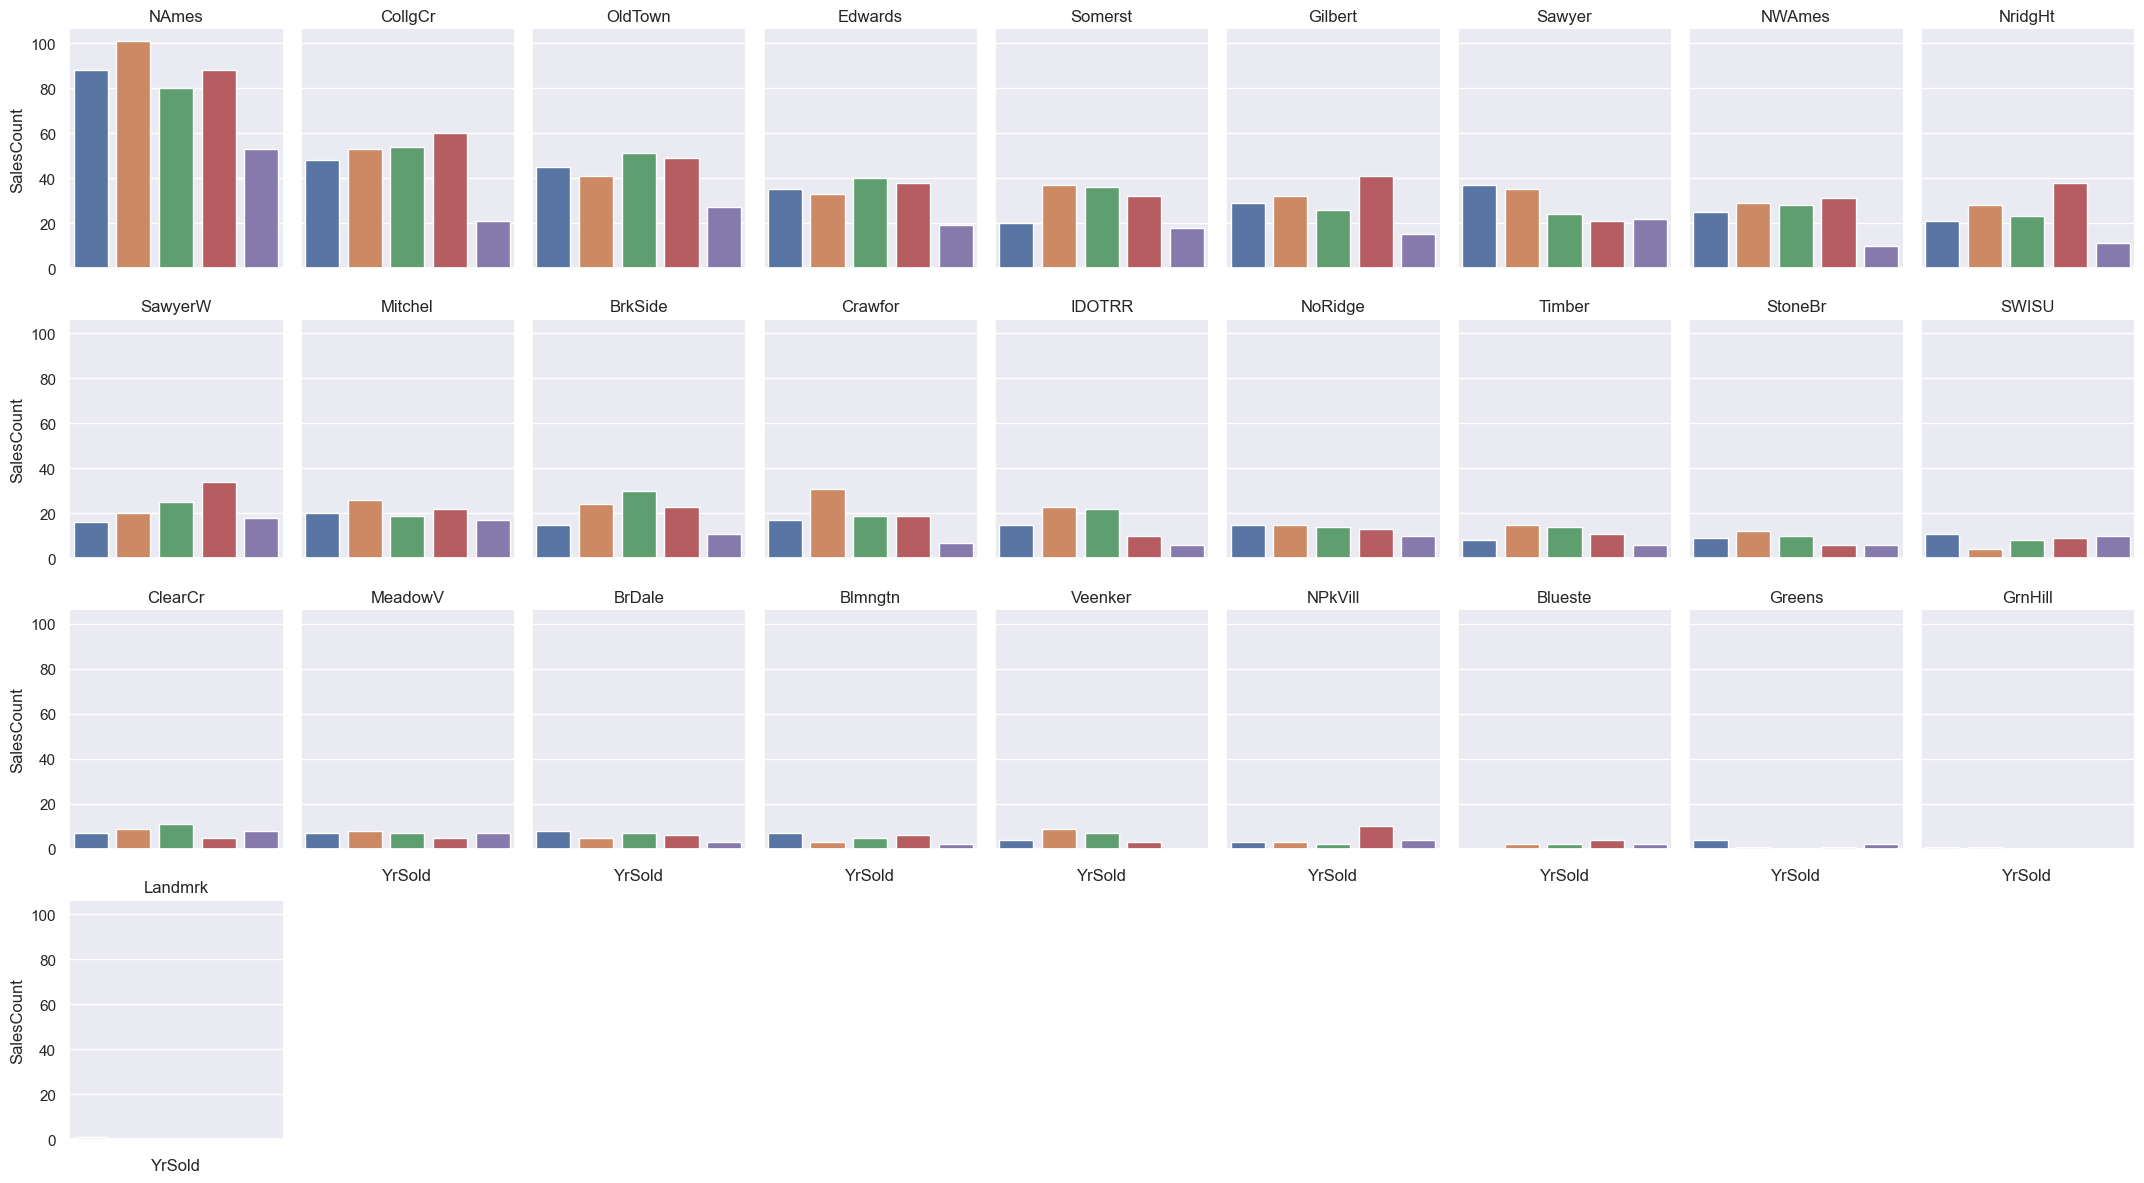

In [41]:
# Sort neighborhoods by total sales
sorted_neighborhoods = yearly_sales_neighborhood.groupby('Neighborhood')['SalesCount'].sum().sort_values(ascending=False).index

# Create categorical plot
g = sns.catplot(data=yearly_sales_neighborhood, 
                x="YrSold", 
                y="SalesCount", 
                col="Neighborhood", 
                col_order=sorted_neighborhoods, 
                col_wrap=9, 
                kind="bar", 
                height=3, 
                aspect=0.8)

# Adjust the titles of individual plots
for i, ax in enumerate(g.axes.flatten()):
    ax.set_title(sorted_neighborhoods[i])

# Adjust the layout
g.set_xticklabels(rotation=90)
plt.tight_layout()

plt.show()


**Yearly we suprisingly see some neighborhoods retained or increased sales through the Financial Crisis, perhaps those areas were more reslient**

In [293]:
monthly_sales_neighborhood = data_raw.groupby(['MoSold','Neighborhood']).size().reset_index(name='SalesCount')
monthly_sales_neighborhood


MoSold Neighborhood  SalesCount
0         1      Blmngtn           1
1         1      BrkSide           6
2         1      ClearCr           1
3         1      CollgCr          16
4         1      Crawfor           3
5         1      Edwards           7
6         1      Gilbert           4
7         1       Greens           1
8         1       IDOTRR           4
9         1      MeadowV           1
10        1      Mitchel           2
11        1        NAmes          12
12        1       NWAmes           5
13        1      NoRidge           4
14        1      NridgHt           5
15        1      OldTown           3
16        1        SWISU           3
17        1       Sawyer           5
18        1      SawyerW           5
19        1      Somerst           6
20        1      StoneBr           2
21        1       Timber           4
22        1      Veenker           1
23        2       BrDale           4
24        2      BrkSide           5
25        2      ClearCr           1
26        2      CollgCr          13
27        2      Crawfor           6
28        2      Edwards           8
29        2      Gilbert           7
30        2       IDOTRR           3
31        2      Mitchel           6
32        2        NAmes          16
33        2      NPkVill           1
34        2       NWAmes           8
35        2      NoRidge           1
36        2      NridgHt           6
37        2      OldTown          10
38        2        SWISU           2
39        2       Sawyer           5
40        2      SawyerW           7
41        2      Somerst           8
42        2       Timber           3
43        2      Veenker           1
44        3      Blmngtn           2
45        3      Blueste           2
46        3       BrDale           2
47        3      BrkSide          11
48        3      ClearCr           5
49        3      CollgCr          17
50        3      Crawfor           8
51        3      Edwards          13
52        3      Gilbert          10
53        3       IDOTRR           7
54        3      MeadowV           2
55        3      Mitchel          11
56        3        NAmes          32
57        3       NWAmes          10
58        3      NoRidge           4
59        3      NridgHt          15
60        3      OldTown          11
61        3        SWISU           8
62        3       Sawyer          13
63        3      SawyerW           5
64        3      Somerst          13
65        3      StoneBr           2
66        3       Timber           4
67        3      Veenker           2
68        4      Blmngtn           2
69        4      Blueste           1
70        4       BrDale           2
71        4      BrkSide          10
72        4      ClearCr           7
73        4      CollgCr          17
74        4      Crawfor           5
75        4      Edwards          26
76        4      Gilbert          12
77        4       IDOTRR           8
78        4      MeadowV           4
79        4      Mitchel          15
80        4        NAmes          38
81        4      NPkVill           4
82        4       NWAmes          10
83        4      NoRidge           5
84        4      NridgHt           7
85        4      OldTown          19
86        4        SWISU           3
87        4       Sawyer          14
88        4      SawyerW          16
89        4      Somerst          15
90        4      StoneBr           2
91        4       Timber           8
92        4      Veenker           2
93        5      Blmngtn           8
94        5      Blueste           2
95        5       BrDale           5
96        5      BrkSide          19
97        5      ClearCr           4
98        5      CollgCr          34
99        5      Crawfor          10
100       5      Edwards          26
101       5      Gilbert          26
102       5       Greens           1
103       5       IDOTRR          11
104       5      MeadowV          10
105       5      Mitchel          16
106       5        NAmes          51
107      

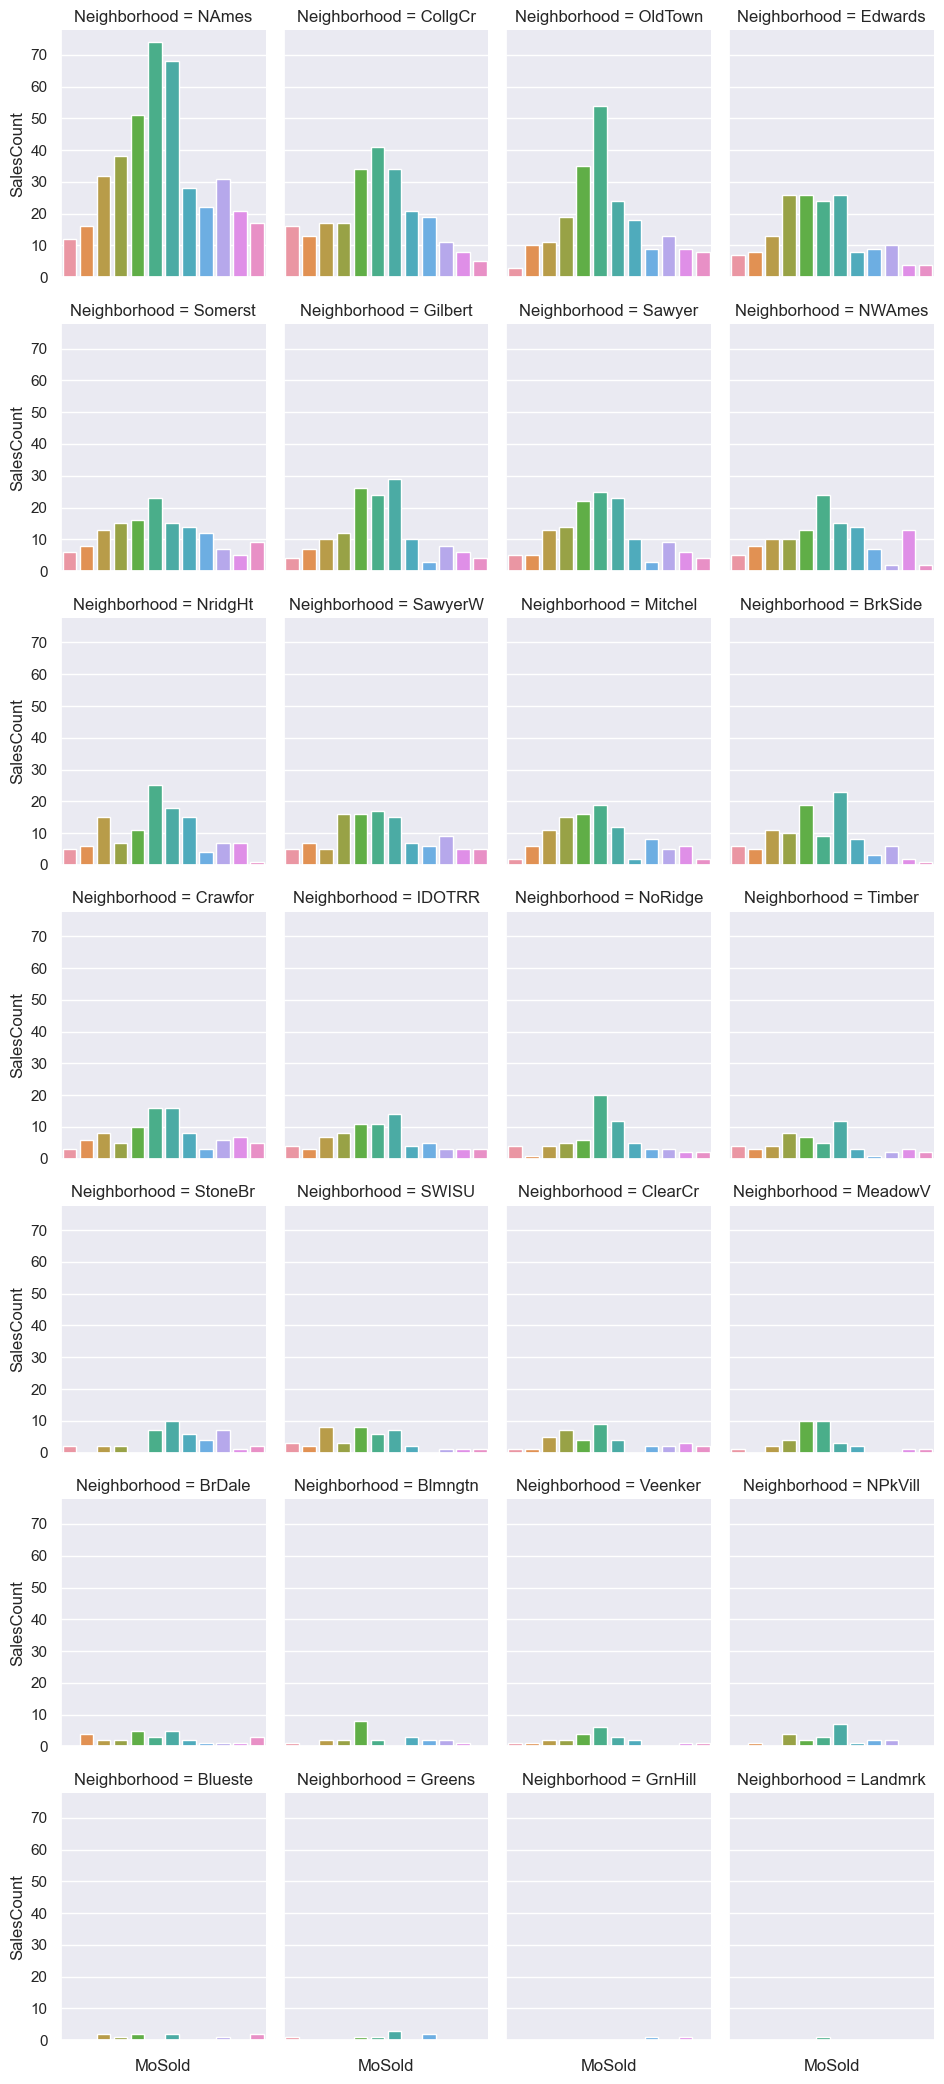

In [294]:
# Sort neighborhoods by total sales
sorted_neighborhoods = monthly_sales_neighborhood.groupby('Neighborhood')['SalesCount'].sum().sort_values(ascending=False).index

# Create categorical plot
g = sns.catplot(data=monthly_sales_neighborhood, 
                x="MoSold", 
                y="SalesCount", 
                col="Neighborhood", 
                col_order=sorted_neighborhoods, 
                col_wrap=4, 
                kind="bar", 
                height=3, 
                aspect=0.8)

# Adjust the layout
g.set_xticklabels(rotation=90)
plt.tight_layout()

plt.show()


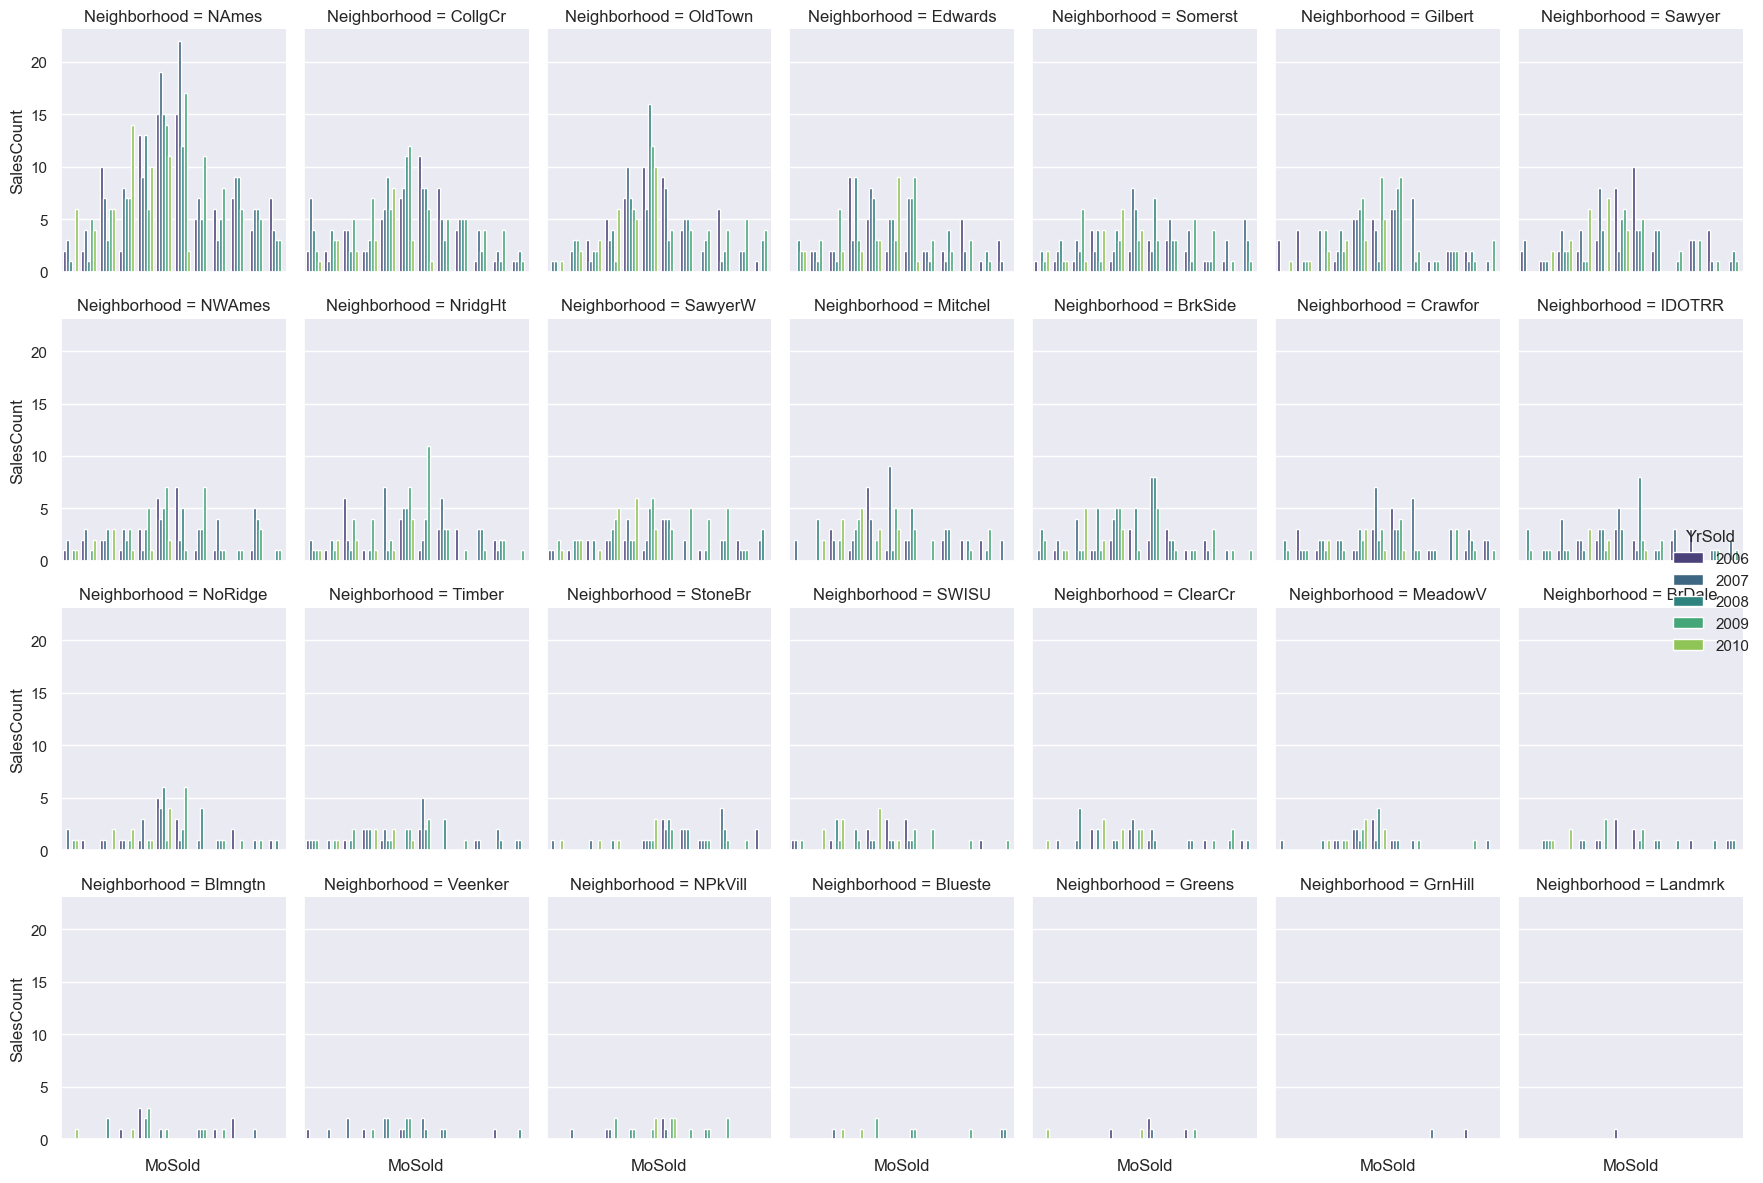

In [45]:
# Group data by 'YrSold', 'MoSold' and 'Neighborhood'
monthly_yearly_sales_neighborhood = data_raw.groupby(['YrSold', 'MoSold','Neighborhood']).size().reset_index(name='SalesCount')

# Sort neighborhoods by total sales
sorted_neighborhoods = monthly_yearly_sales_neighborhood.groupby('Neighborhood')['SalesCount'].sum().sort_values(ascending=False).index

# Create categorical plot
g = sns.catplot(data=monthly_yearly_sales_neighborhood, 
                x="MoSold", 
                y="SalesCount", 
                col="Neighborhood", 
                col_order=sorted_neighborhoods, 
                hue="YrSold",
                col_wrap=7, 
                kind="bar", 
                height=3, 
                aspect=0.8,
                palette="viridis")

# Adjust the layout
g.set_xticklabels(rotation=90)
plt.tight_layout()

plt.show()


/var/folders/6k/0v57cgbd2k37vp0lh44zby640000gn/T/ipykernel_1971/3617625878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearmonth_sales_neighborhood_upto_2009['CumulativeSales'] = yearmonth_sales_neighborhood_upto_2009.groupby('Neighborhood')['SalesCount'].cumsum()


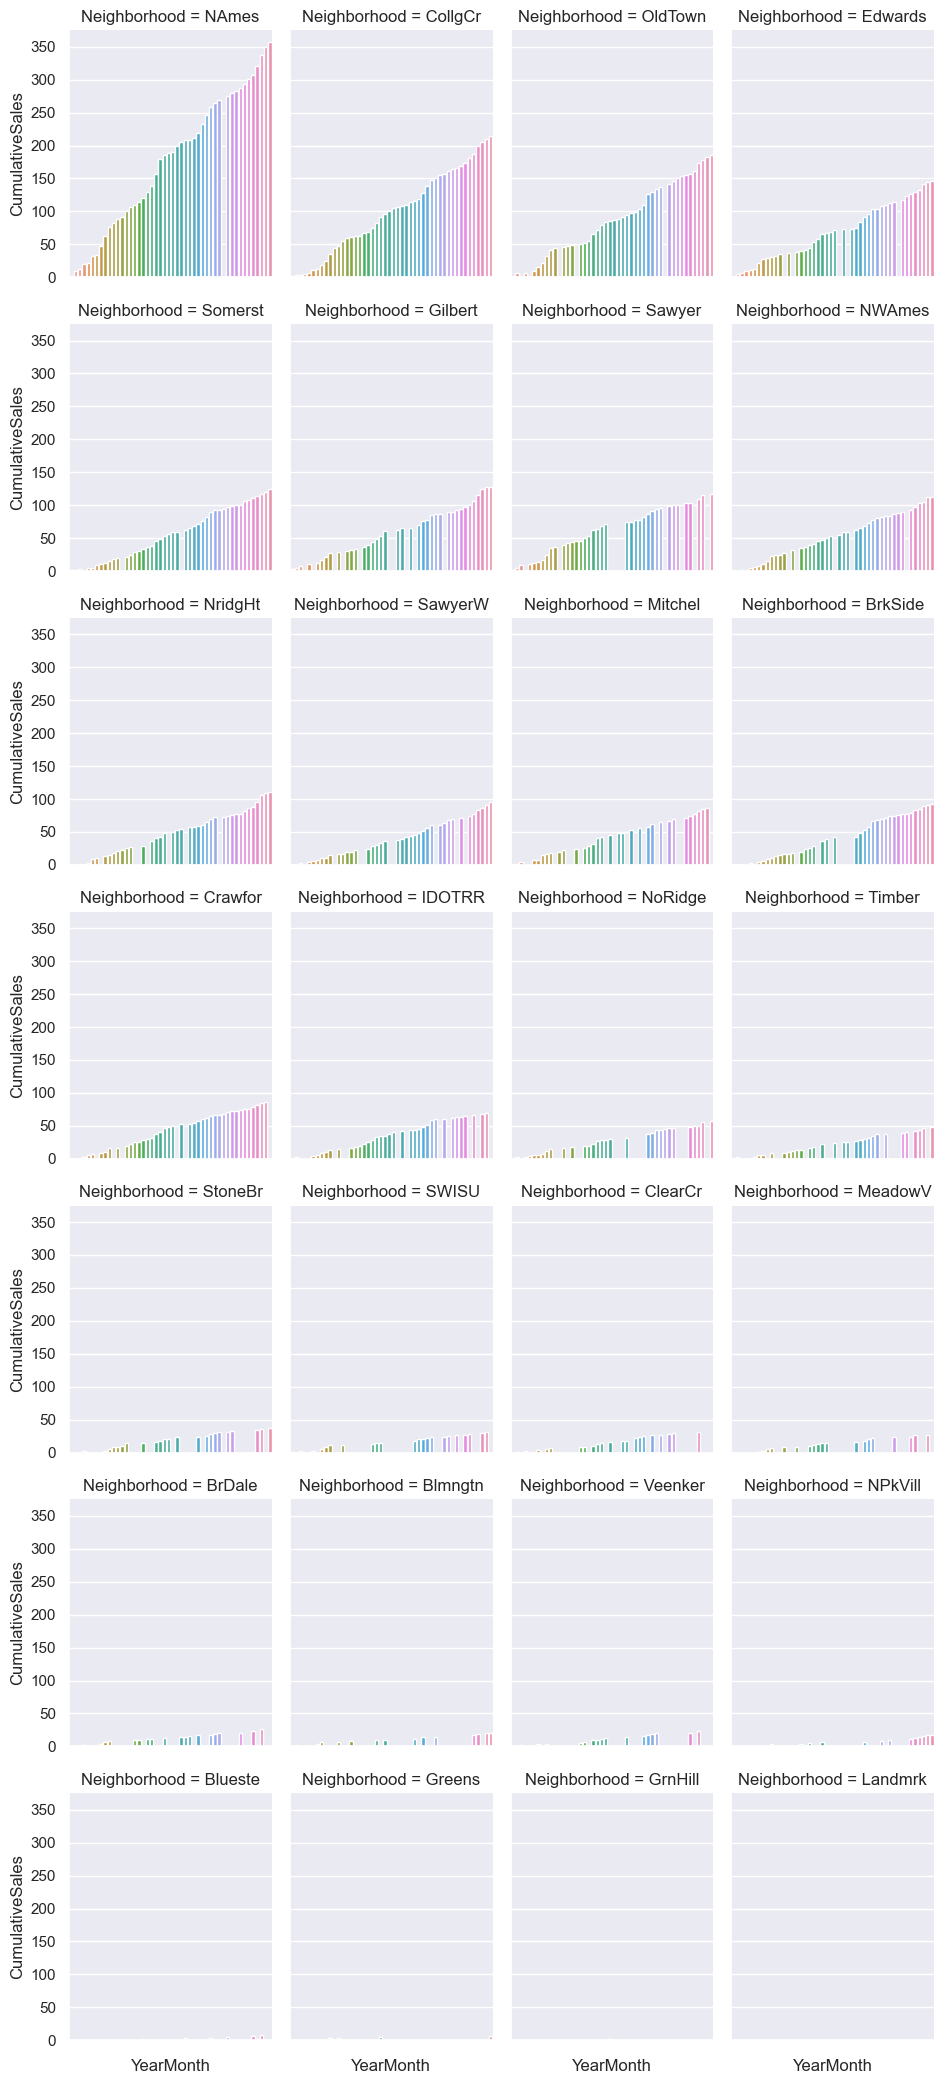

In [46]:
# Calculate cumulative sales
yearmonth_sales_neighborhood_upto_2009['CumulativeSales'] = yearmonth_sales_neighborhood_upto_2009.groupby('Neighborhood')['SalesCount'].cumsum()

# Create categorical plot
g = sns.catplot(data=yearmonth_sales_neighborhood_upto_2009, 
                x="YearMonth", 
                y="CumulativeSales", 
                col="Neighborhood", 
                col_order=sorted_neighborhoods, 
                col_wrap=4, 
                kind="bar", 
                height=3, 
                aspect=0.8)

# Adjust the layout
g.set_xticklabels(rotation=90)
plt.tight_layout()

plt.show()




We see how the number of home sales changed over time, how about home prices?



*Monthly Sale Price Changes per Neighborhood*

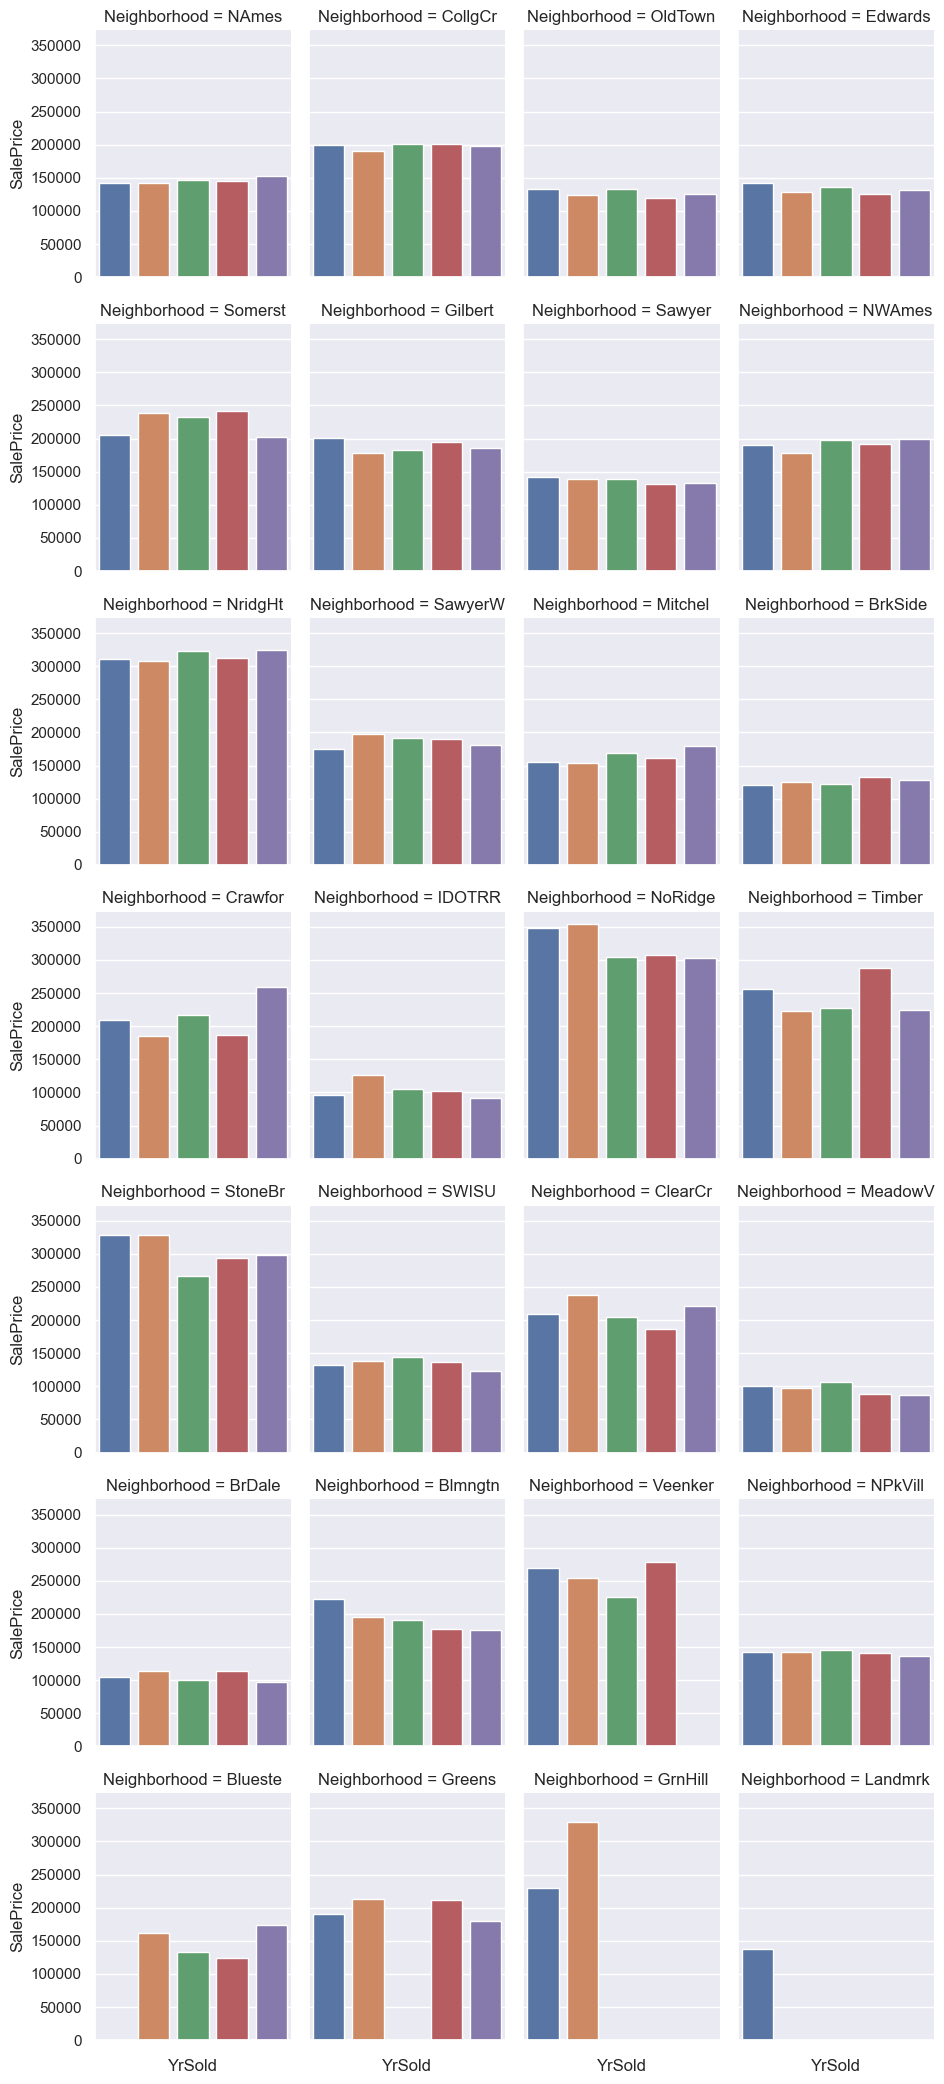

In [312]:
# Calculate average sales price per neighborhood per month
average_price_per_year = data_raw.groupby(['YrSold', 'Neighborhood'])['SalePrice'].mean().reset_index()

# Merge average_price_per_month with monthly_sales_neighborhood
yearly_sales_neighborhood = pd.merge(yearly_sales_neighborhood, average_price_per_year, how='left', on=['YrSold', 'Neighborhood'])

# Sort neighborhoods by total sales
sorted_neighborhoods = yearly_sales_neighborhood.groupby('Neighborhood')['SalesCount'].sum().sort_values(ascending=False).index

# Create categorical plot
g = sns.catplot(data=yearly_sales_neighborhood, 
                x="YrSold", 
                y="SalePrice", 
                col="Neighborhood", 
                col_order=sorted_neighborhoods, 
                col_wrap=4, 
                kind="bar", 
                height=3, 
                aspect=0.8)

# Adjust the layout
g.set_xticklabels(rotation=90)
plt.tight_layout()

plt.show()


*Monthly Sale Price Changes per Neighborhood*

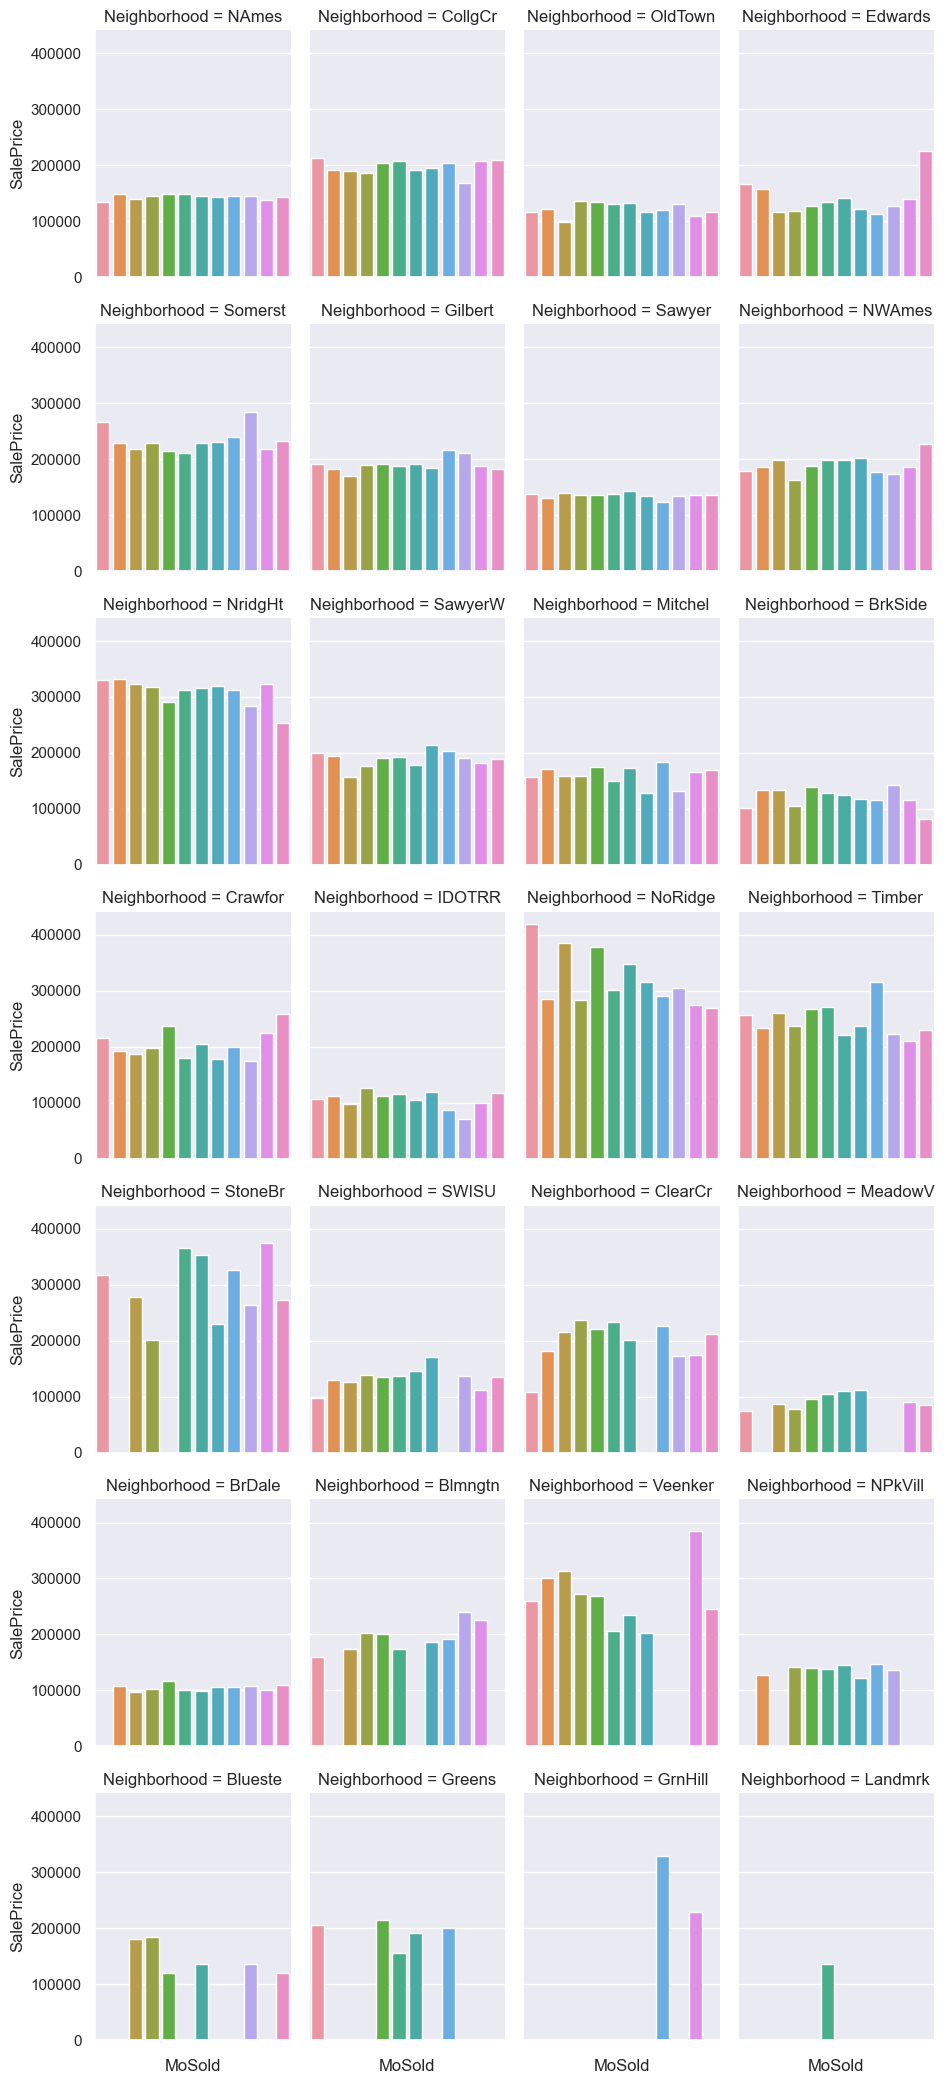

In [303]:
# Calculate average sales price per neighborhood per month
average_price_per_month = data_raw.groupby(['MoSold', 'Neighborhood'])['SalePrice'].mean().reset_index()

# Merge average_price_per_month with monthly_sales_neighborhood
monthly_sales_neighborhood = pd.merge(monthly_sales_neighborhood, average_price_per_month, how='left', on=['MoSold', 'Neighborhood'])

# Sort neighborhoods by total sales
sorted_neighborhoods = monthly_sales_neighborhood.groupby('Neighborhood')['SalesCount'].sum().sort_values(ascending=False).index

# Create categorical plot
g = sns.catplot(data=monthly_sales_neighborhood, 
                x="MoSold", 
                y="SalePrice", 
                col="Neighborhood", 
                col_order=sorted_neighborhoods, 
                col_wrap=4, 
                kind="bar", 
                height=3, 
                aspect=0.8)

# Adjust the layout
g.set_xticklabels(rotation=90)
plt.tight_layout()

plt.show()


**What Else do We Know About Ames??**

*Mostly Single Familiies*

<Axes: >

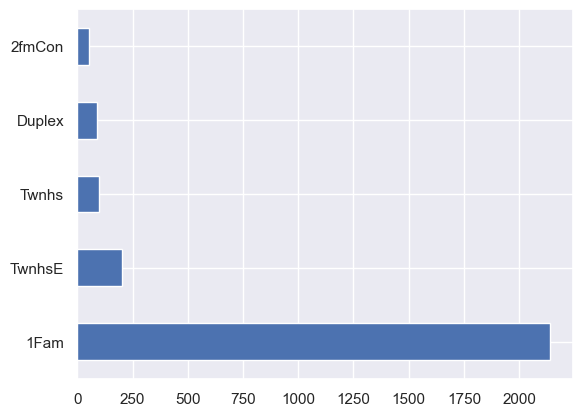

In [341]:
data_raw.BldgType.value_counts().plot.barh()

*Mostly Single Story Homes*

<Axes: >

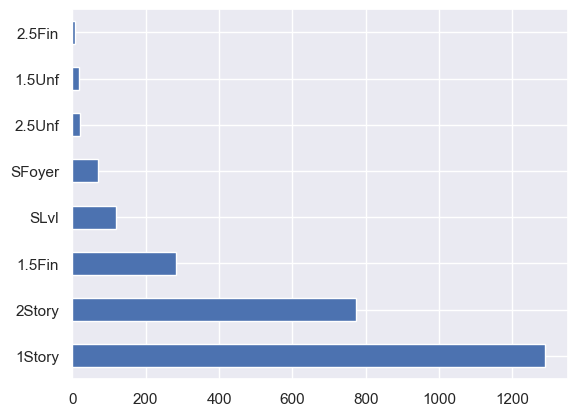

In [338]:
data_raw.HouseStyle.value_counts().plot.barh()

*Significant Ramp up and then Reduction of Houses built in 95's - 2005's*

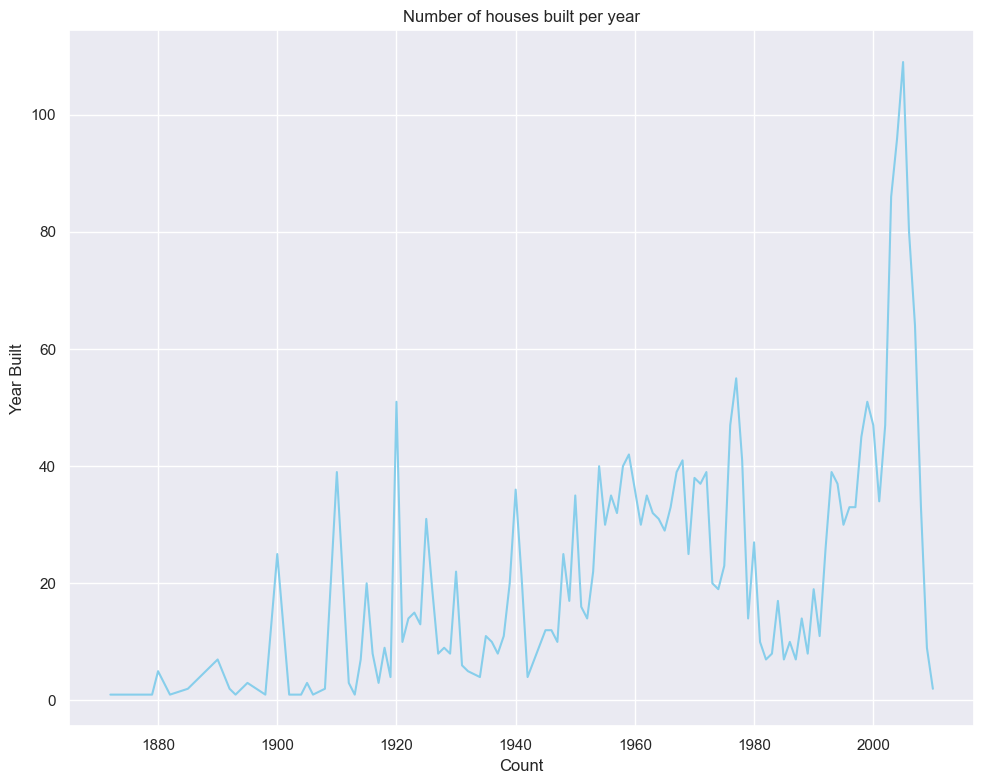

In [349]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate value counts and sort by year
sorted_data = data_raw['YearBuilt'].value_counts().sort_index()

# Create a DataFrame from the sorted data
df = pd.DataFrame({'YearBuilt': sorted_data.index, 'Count': sorted_data.values})

# Create the plot
plt.figure(figsize=(10,8))
sns.lineplot(data=df, y='Count', x='YearBuilt', orient='x', color='skyblue')
plt.title('Number of houses built per year')
plt.xlabel('Count')
plt.ylabel('Year Built')
plt.tight_layout()
plt.show()


*Significant Ramp up and then Reduction of Houses built in 95's - 2005's*

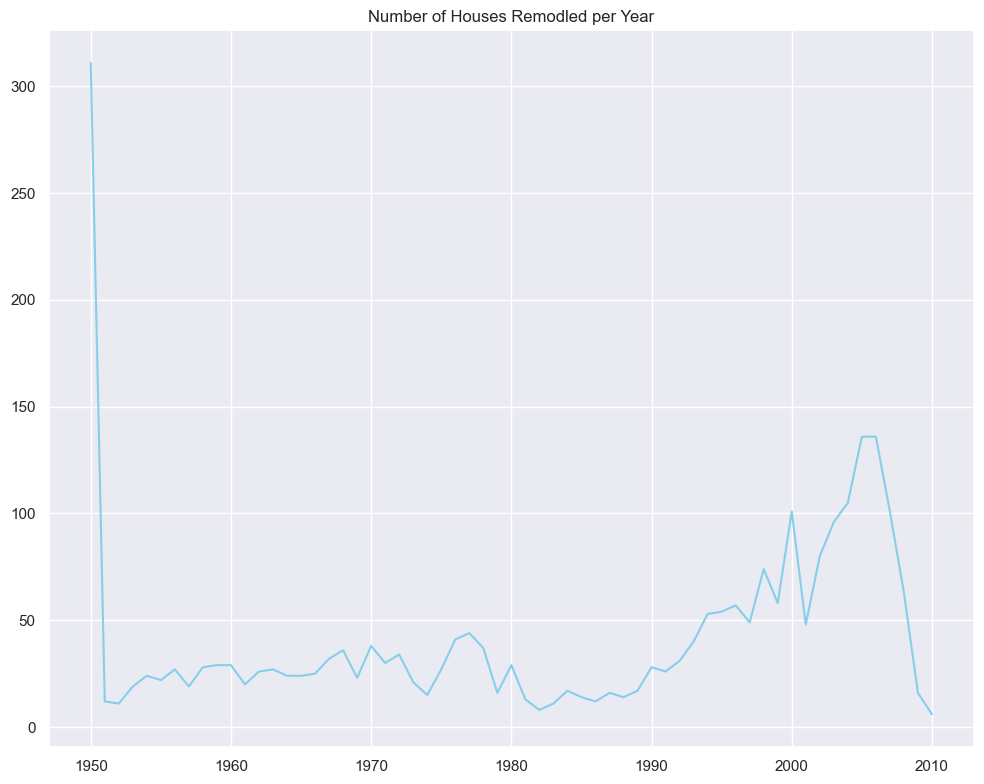

In [334]:
# Calculate value counts and sort by year
sorted_data = data_raw['YearRemodAdd'].value_counts().sort_index()

# Create a DataFrame from the sorted data
df = pd.DataFrame({'YearRemodAdd': sorted_data.index, 'Count': sorted_data.values})

# Create the plot
plt.figure(figsize=(10,8))
sns.lineplot(data=df, y='Count', x='YearRemodAdd', orient='x', color='skyblue')
plt.title('Number of Houses Remodled per Year')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()


*Let's See How We Can Bin Neighborhoods Together Actually*

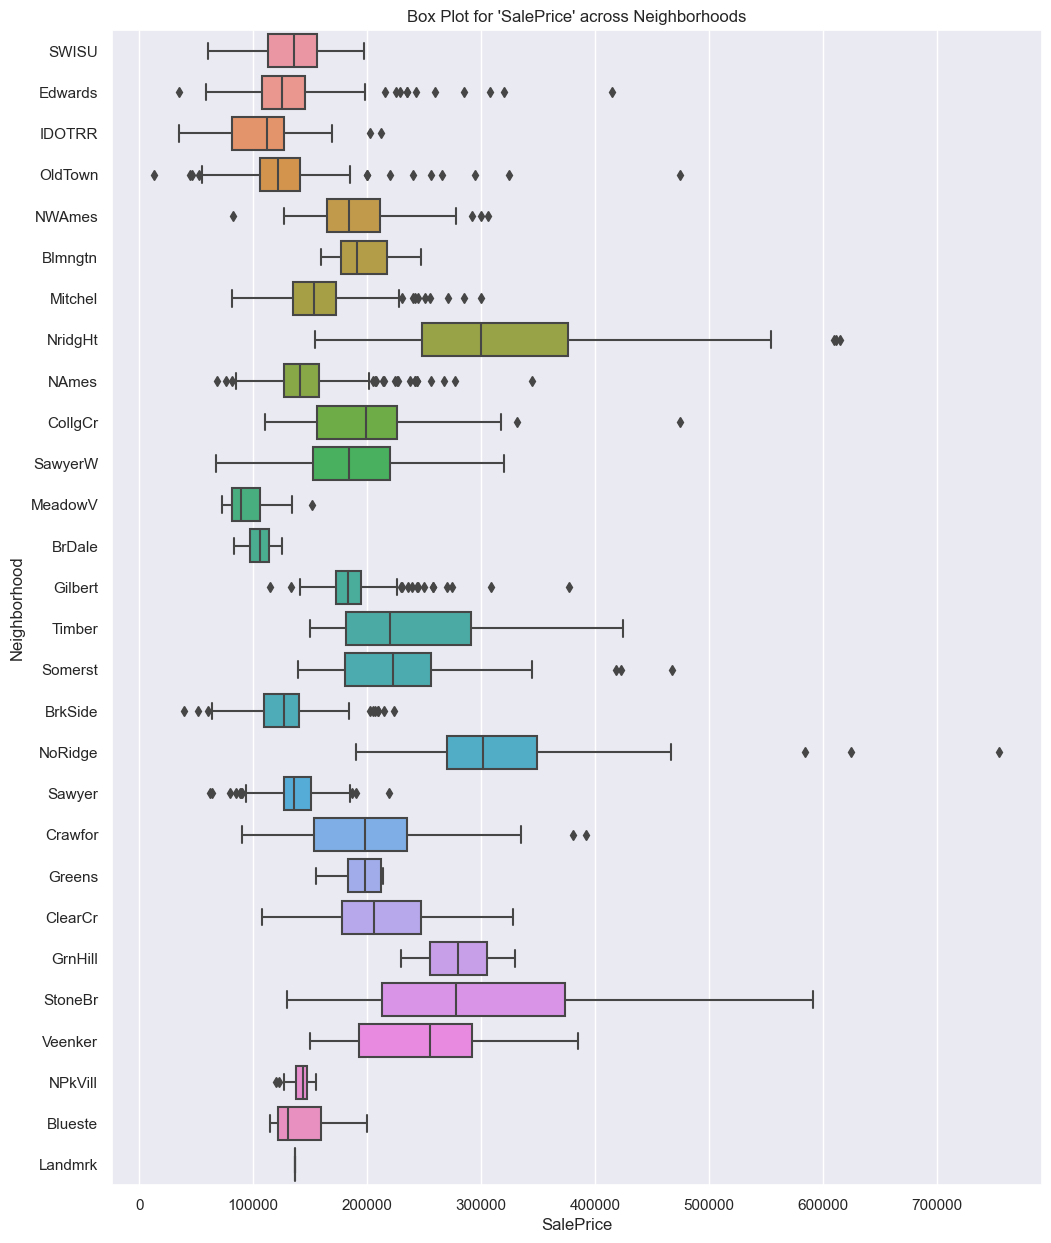

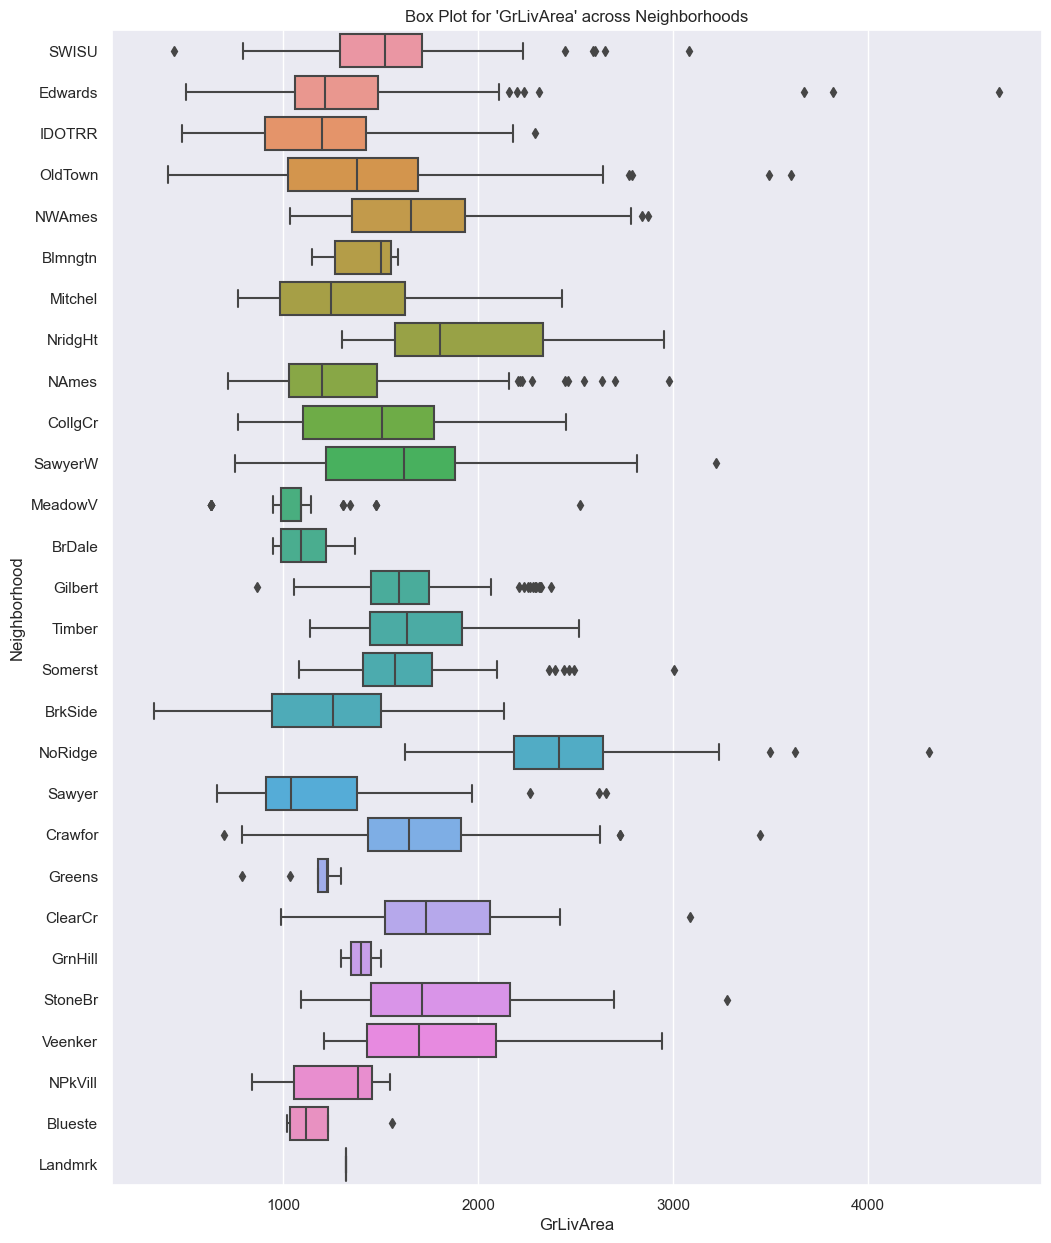

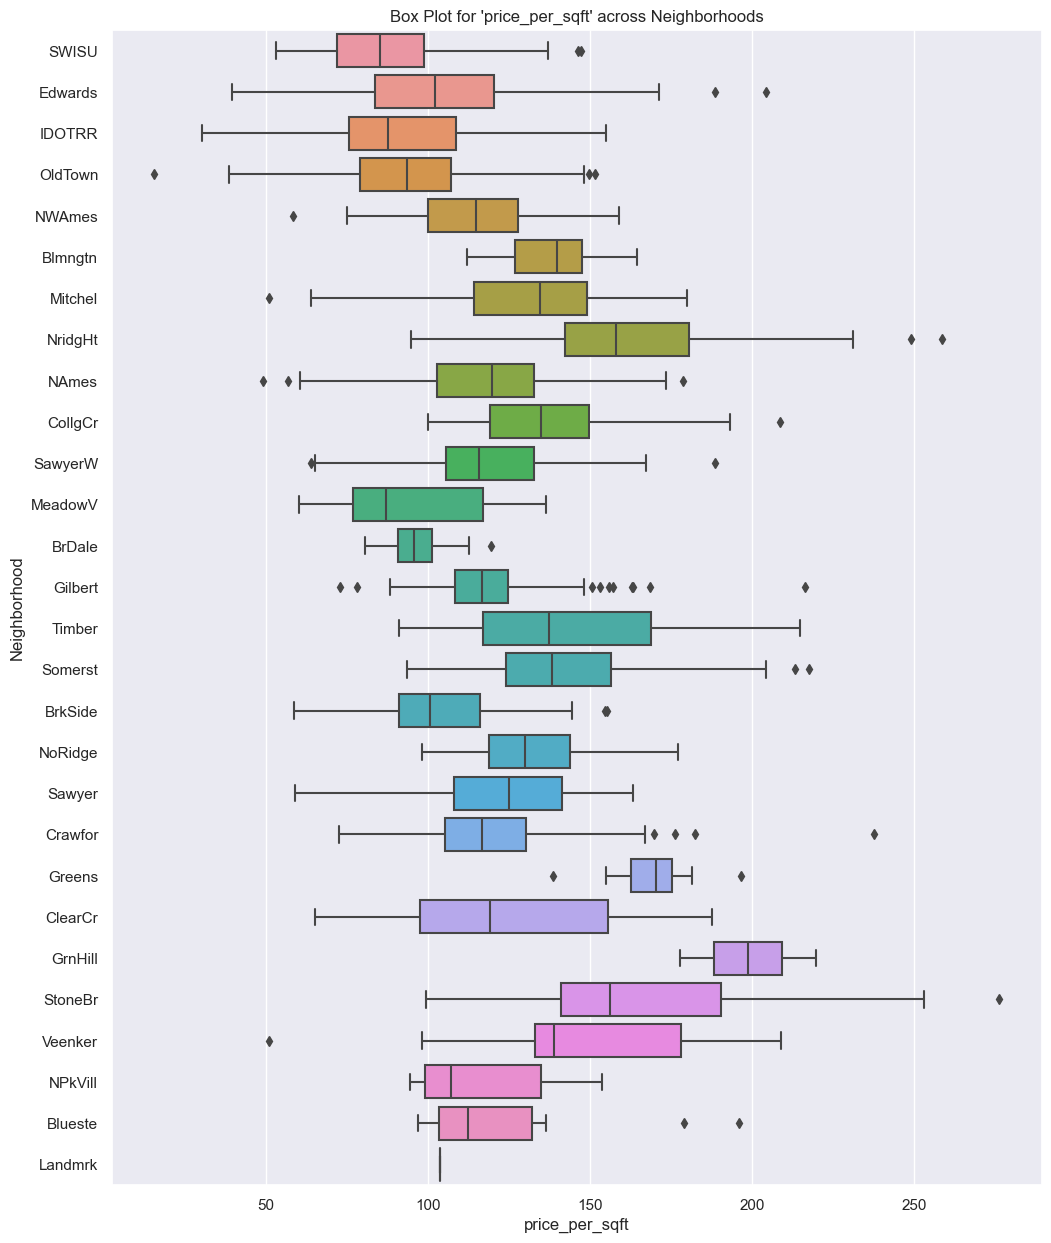

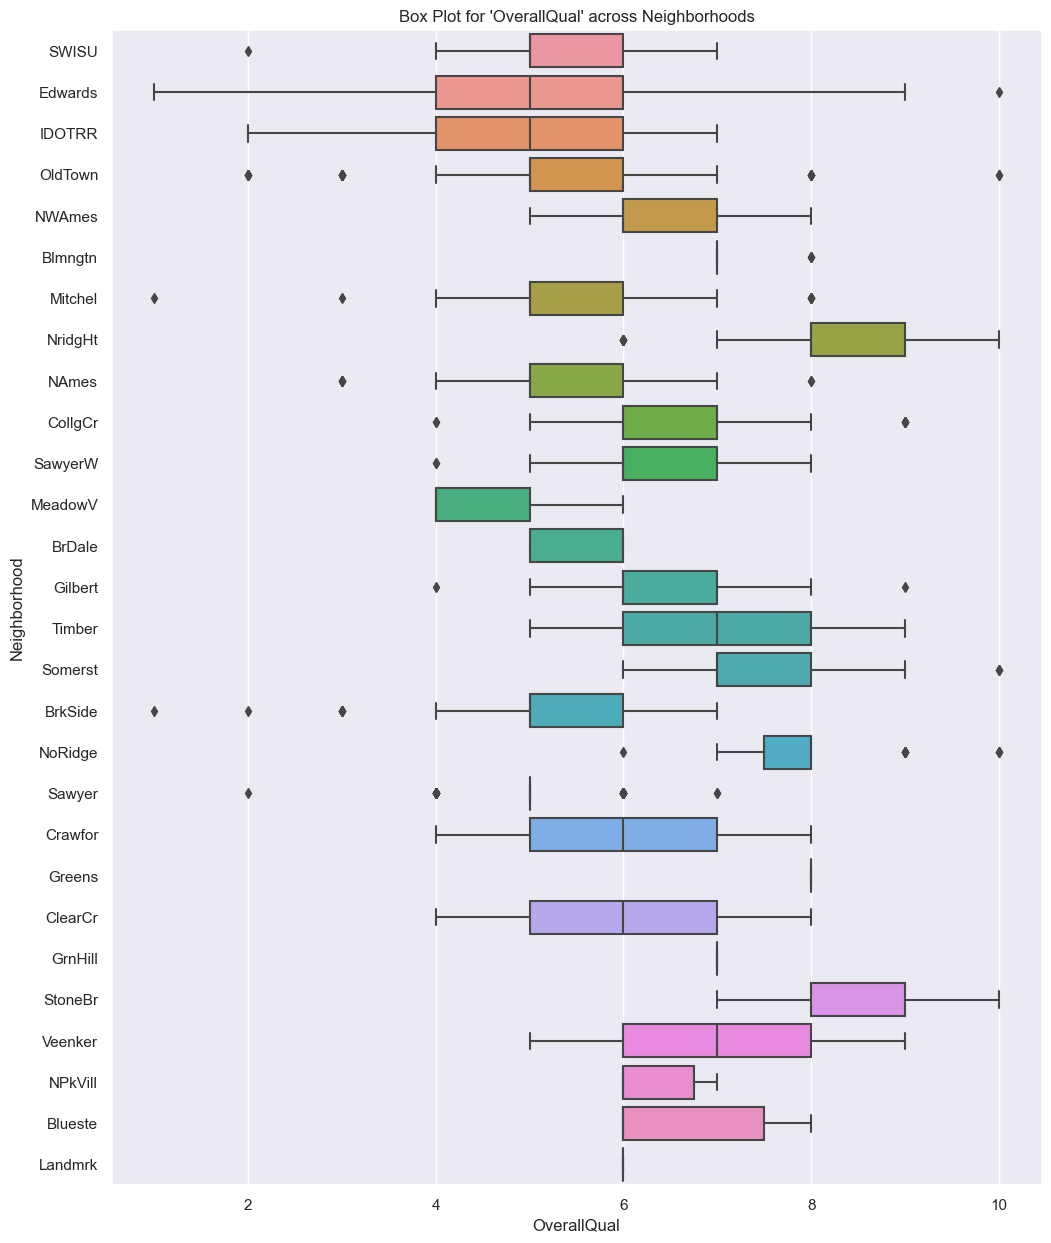

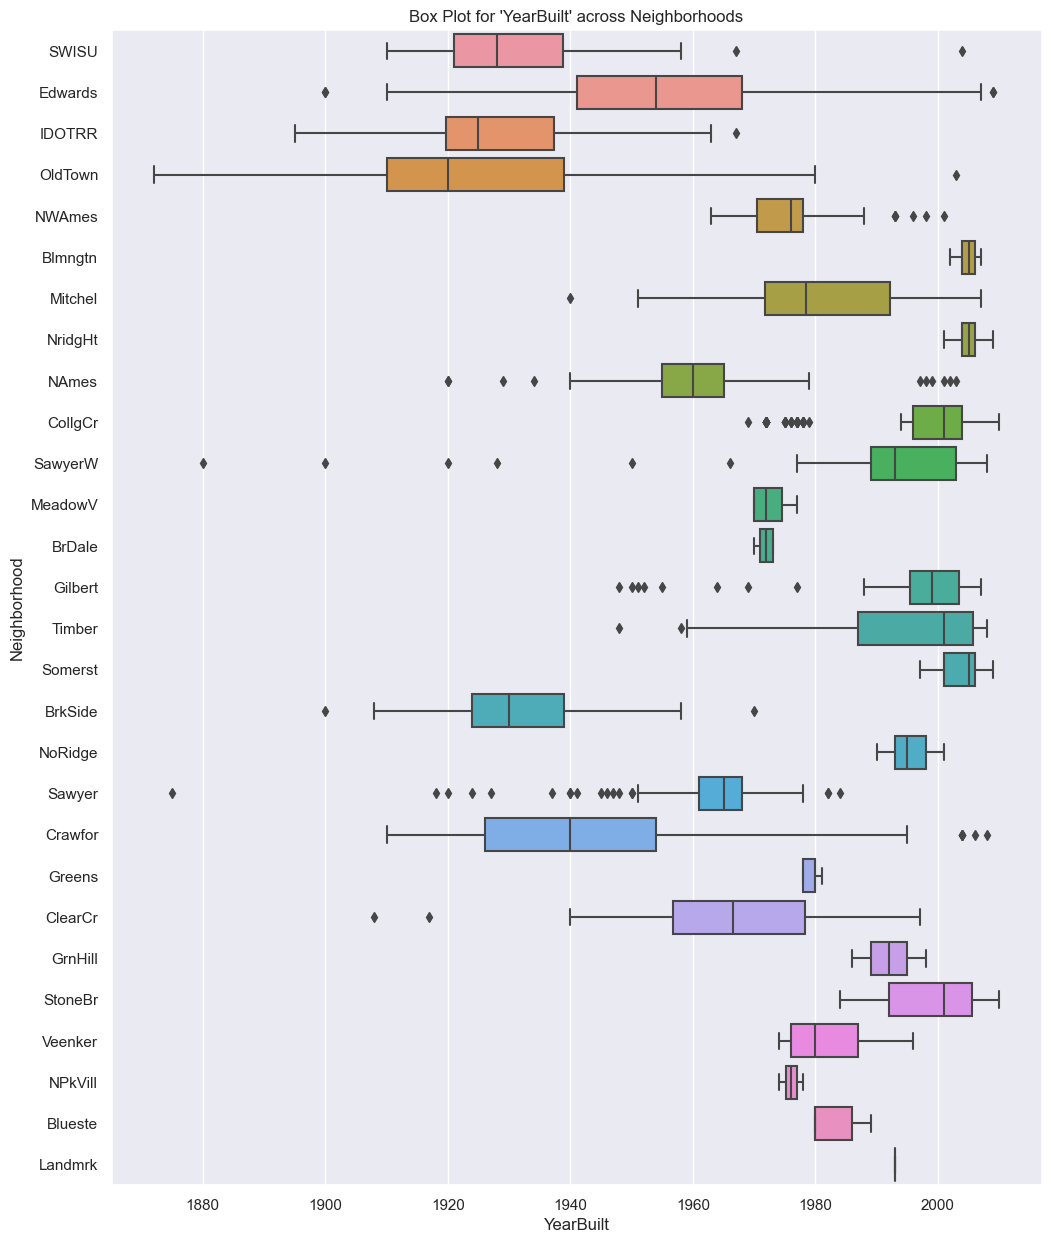

In [352]:
# There a bit hard to compare one-to-one, so we'll have to bin them somehow

import seaborn as sns

# Create a new column for price per square foot
data_raw['price_per_sqft'] = data_raw['SalePrice'] / data_raw['GrLivArea']

# Variables for box plots
variables = ['SalePrice', 'GrLivArea', 'price_per_sqft', 'OverallQual','YearBuilt']

# Empty DataFrame to store results
results_df = pd.DataFrame()

# Loop through the variables and create box plots, also calculate statistics
for variable in variables:
    # Calculate statistics for each neighborhood
    temp_df = data_raw.groupby('Neighborhood')[variable].agg(['min', 'max', 'median', 'mean', 'std']).reset_index()
    temp_df.columns = ['Neighborhood', 'Min', 'Max', 'Median', 'Mean', 'Std']
    temp_df['Variable'] = variable
    temp_df['Q1'] = data_raw.groupby('Neighborhood')[variable].quantile(0.25)
    temp_df['Q3'] = data_raw.groupby('Neighborhood')[variable].quantile(0.75)
    
    # Concatenate the temporary DataFrame with the results DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

    # Plot box plot using seaborn
    plt.figure(figsize=(12, 15))
    sns.boxplot(x=variable, y="Neighborhood", data=data_raw, orient='h')
    plt.title(f"Box Plot for '{variable}' across Neighborhoods")

    plt.show()


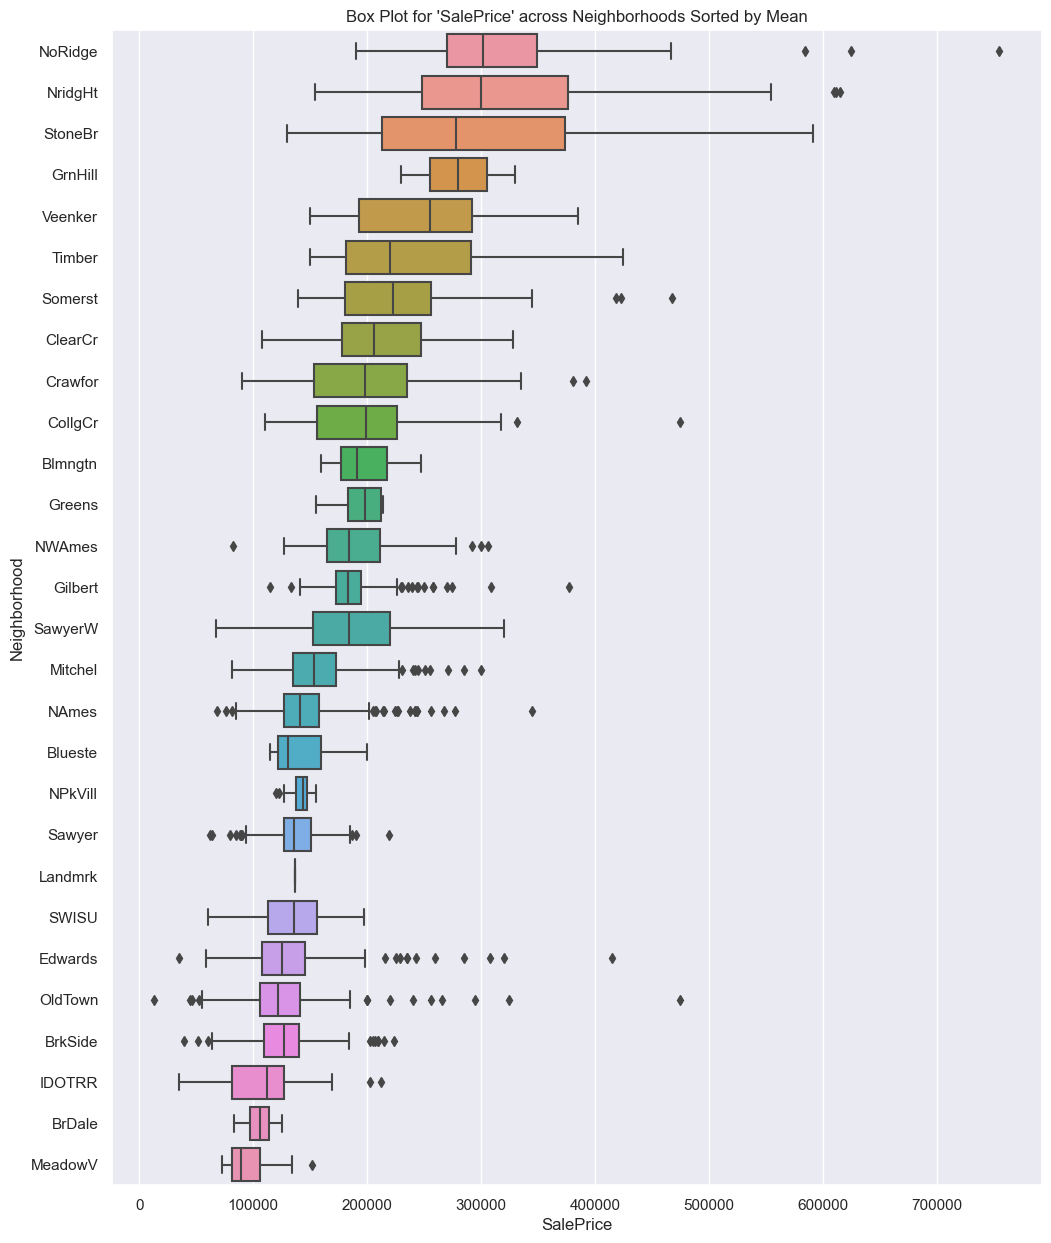

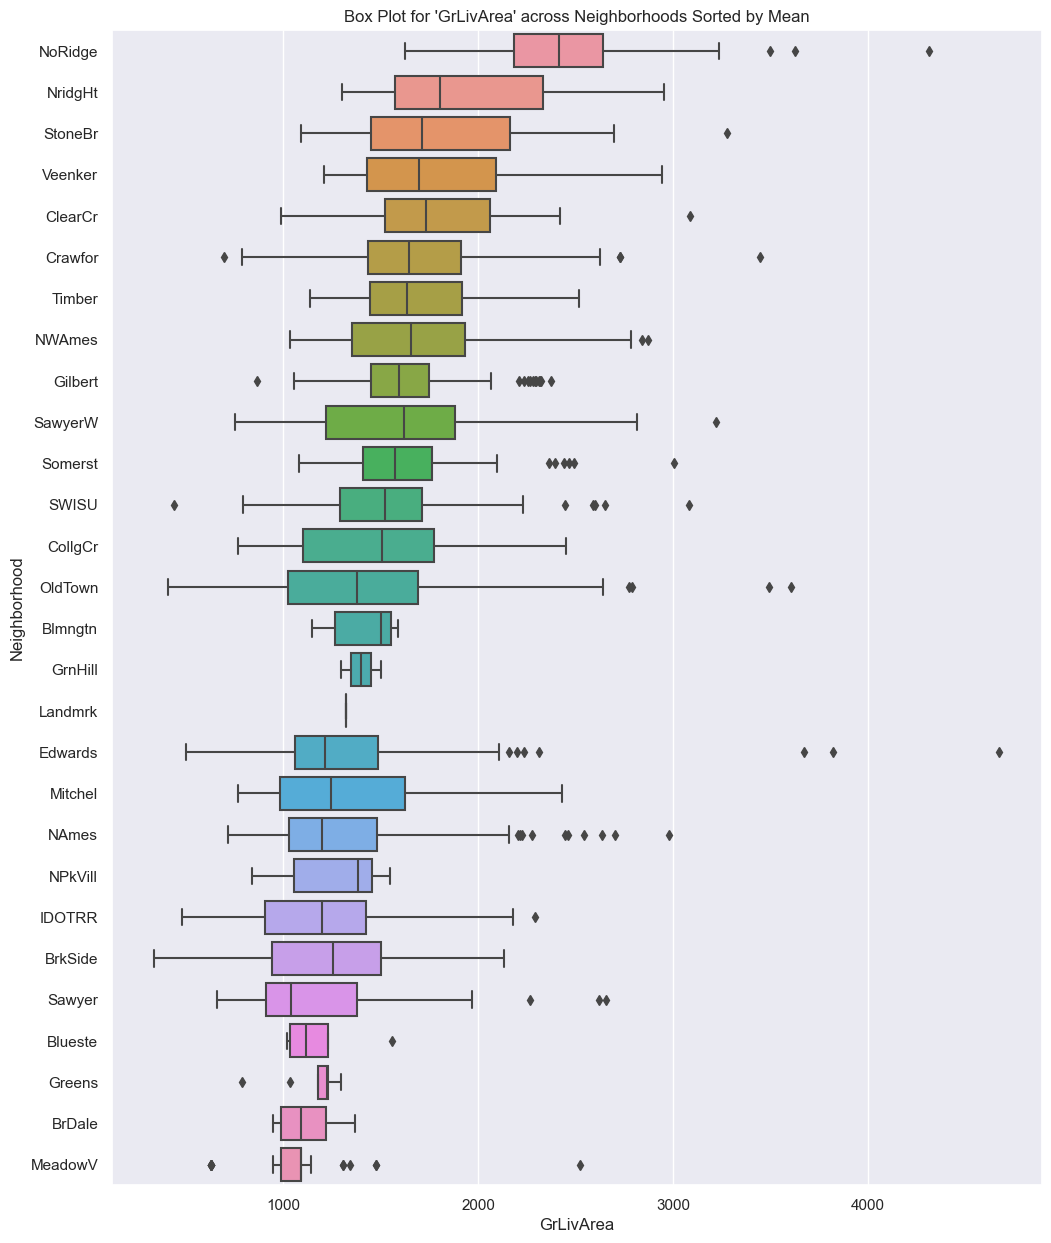

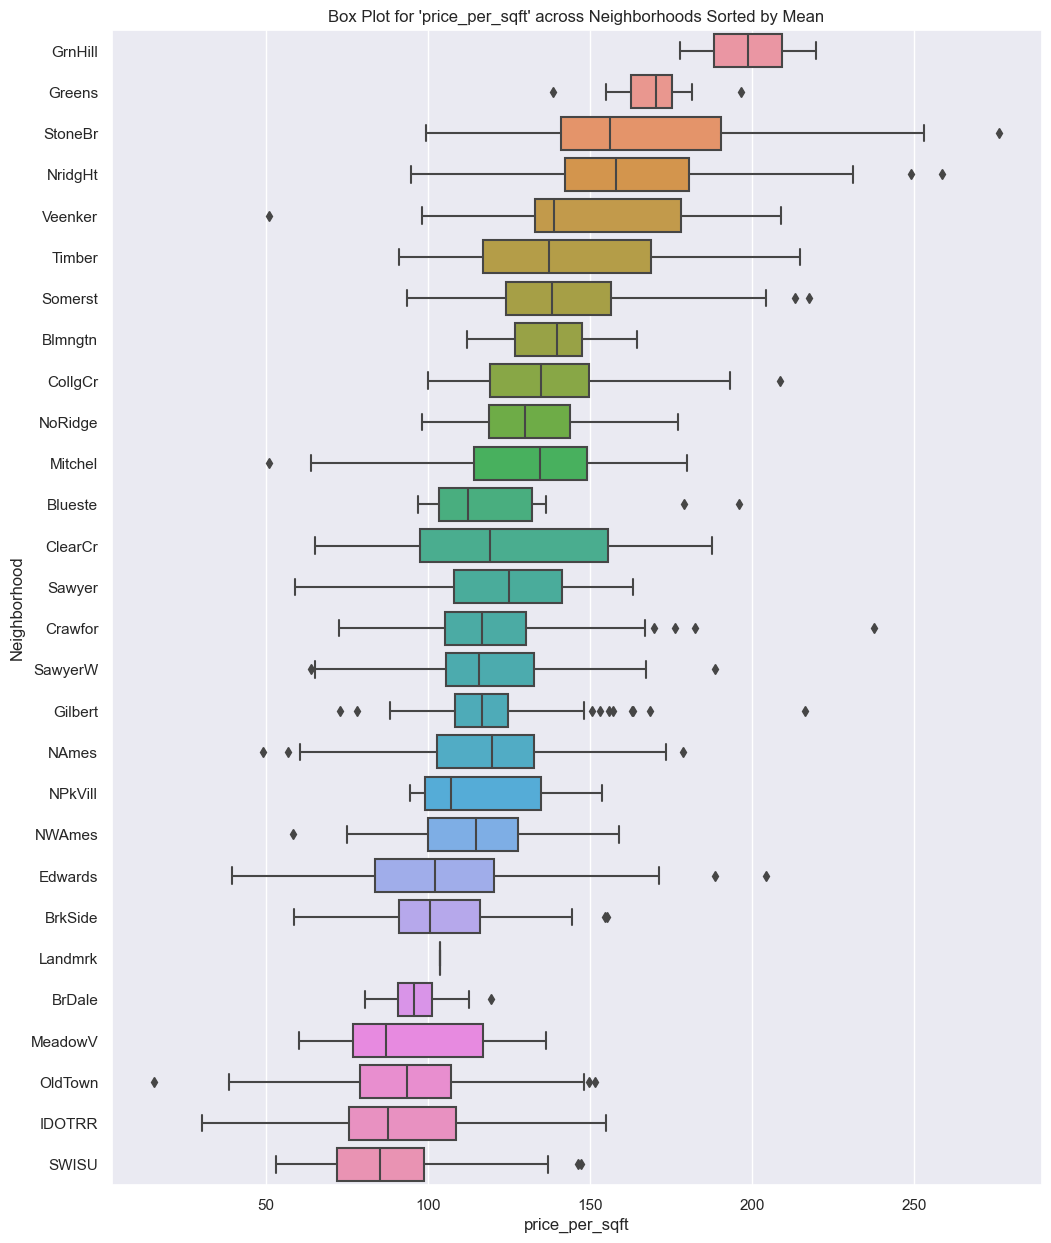

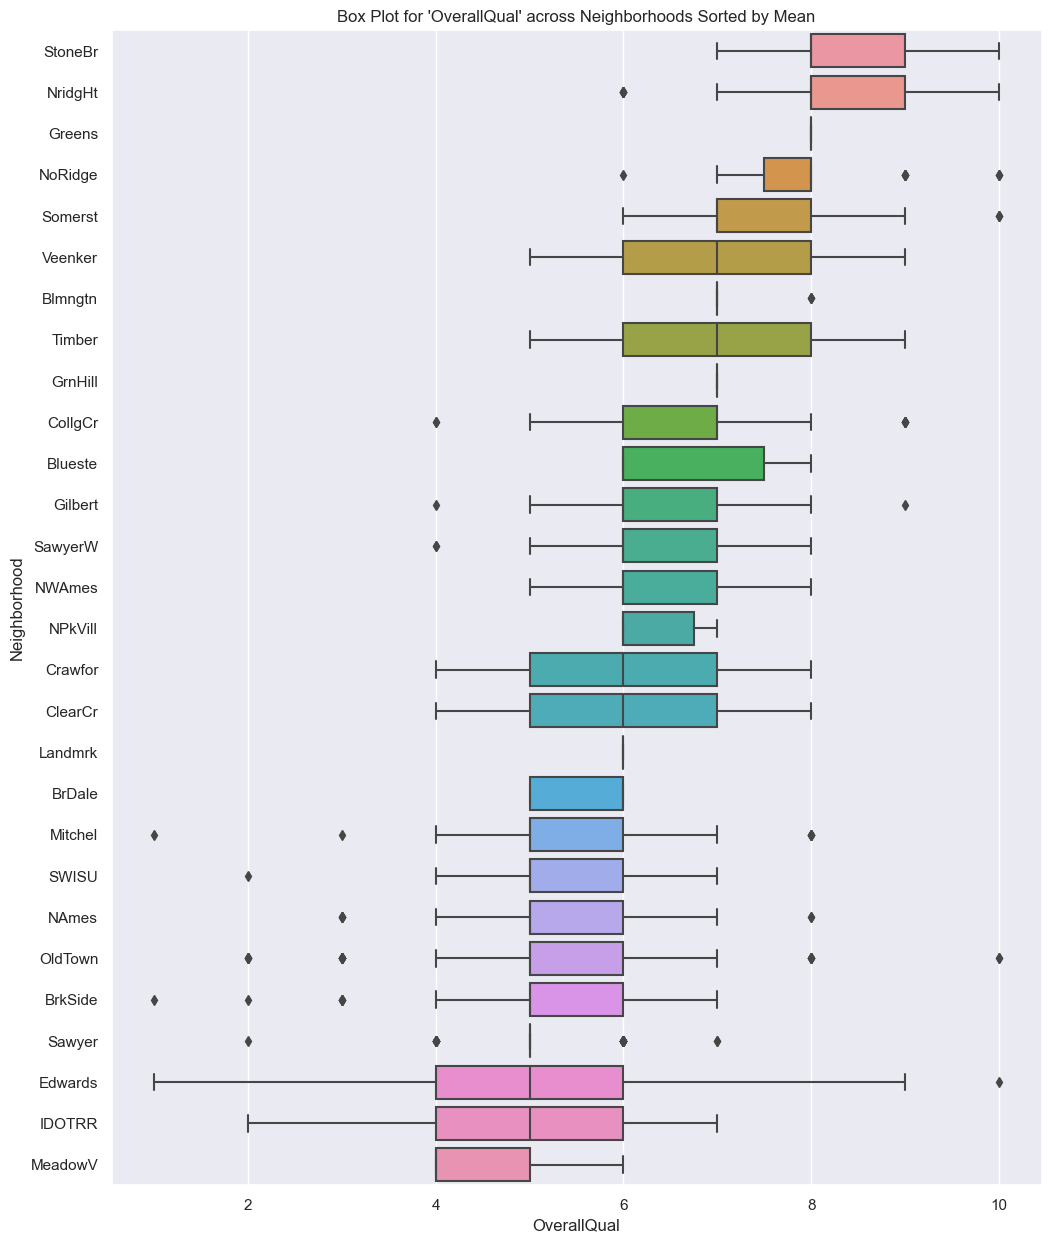

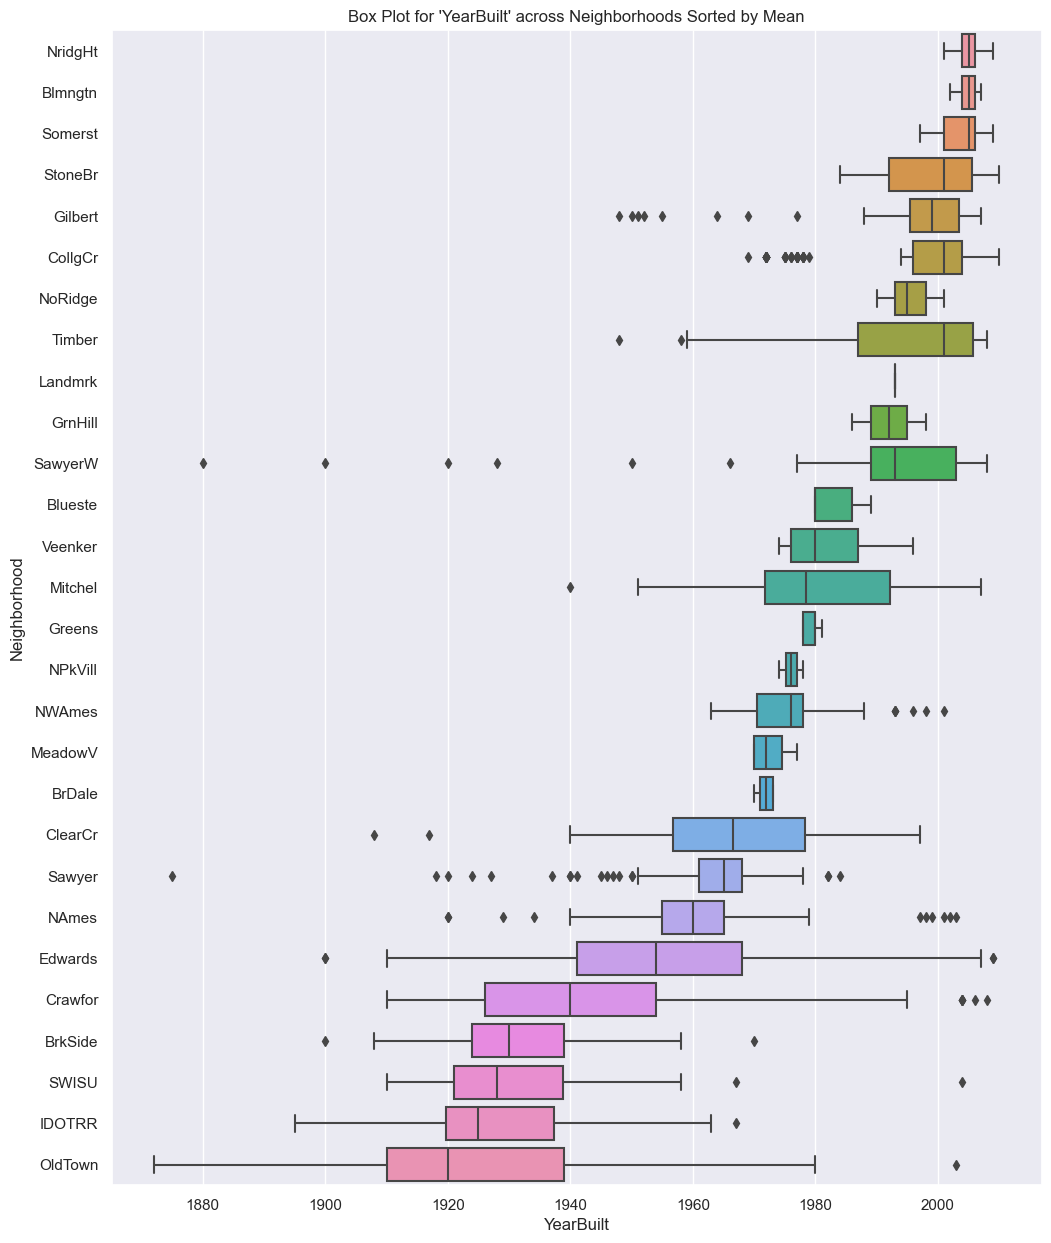

In [47]:
# Variables for box plots
variables = ['SalePrice', 'GrLivArea', 'price_per_sqft', 'OverallQual', 'YearBuilt']

# Loop through the variables and create box plots, also calculate statistics
for variable in variables:
    # Calculate statistics for each neighborhood
    temp_df = data_raw.groupby('Neighborhood')[variable].agg(['min', 'max', 'median', 'mean', 'std']).reset_index()
    temp_df.columns = ['Neighborhood', 'Min', 'Max', 'Median', 'Mean', 'Std']
    temp_df['Variable'] = variable
    temp_df['Q1'] = data_raw.groupby('Neighborhood')[variable].quantile(0.25)
    temp_df['Q3'] = data_raw.groupby('Neighborhood')[variable].quantile(0.75)

    # Sort the DataFrame by 'Mean'
    temp_df = temp_df.sort_values(by='Mean', ascending=False)
    
    # Plot box plot using seaborn
    plt.figure(figsize=(12, 15))
    sns.boxplot(x=variable, y="Neighborhood", data=data_raw, order=temp_df['Neighborhood'], orient='h')
    plt.title(f"Box Plot for '{variable}' across Neighborhoods Sorted by Mean")

    plt.show()

    

In [357]:
# Need to group them together in some way

# Create an empty dictionary to store the bins for each variable
variables = ['SalePrice']
# , 'OverallQual', 'OverallCond', 'GrLivArea', 'price_per_sqft','OverallQual','OverallCond'
variable_bins = {}

# Iterate over the variables in results_df
for variable in variables:
    # Get the mean values for the variable per neighborhood
    variable_data = results_df[results_df['Variable'] == variable]
    variable_means = variable_data['Mean']
    neighborhoods = variable_data['Neighborhood']
    
    # Calculate the bins based on quantiles
    labels = [i for i in range(1, 16)]
    bins = pd.qcut(variable_means, q=15, labels=labels)
    
    # Store the neighborhood and their corresponding bin in a dictionary
    bin_dict = {}
    for neighborhood, bin_num in zip(neighborhoods, bins):
        if bin_num in bin_dict:
            bin_dict[bin_num].append(neighborhood)
        else:
            bin_dict[bin_num] = [neighborhood]

    # Store the bins for the variable
    variable_bins[variable] = bin_dict

# Sorting and printing the bins
for variable, bins in variable_bins.items():
    print(f"Variable: {variable}")
    sorted_bins = dict(sorted(bins.items()))
    for bin_num, bin_neighborhoods in sorted_bins.items():
        print(f"Bin {bin_num}: {bin_neighborhoods}")
    print()


Variable: SalePrice
Bin 1: ['BrDale', 'MeadowV']
Bin 2: ['BrkSide', 'IDOTRR']
Bin 3: ['Edwards', 'OldTown']
Bin 4: ['Landmrk', 'SWISU']
Bin 5: ['NPkVill', 'Sawyer']
Bin 6: ['Blueste']
Bin 7: ['Mitchel', 'NAmes']
Bin 8: ['Gilbert', 'SawyerW']
Bin 9: ['Greens', 'NWAmes']
Bin 10: ['Blmngtn', 'CollgCr']
Bin 11: ['Crawfor']
Bin 12: ['ClearCr', 'Somerst']
Bin 13: ['Timber', 'Veenker']
Bin 14: ['GrnHill', 'StoneBr']
Bin 15: ['NoRidge', 'NridgHt']



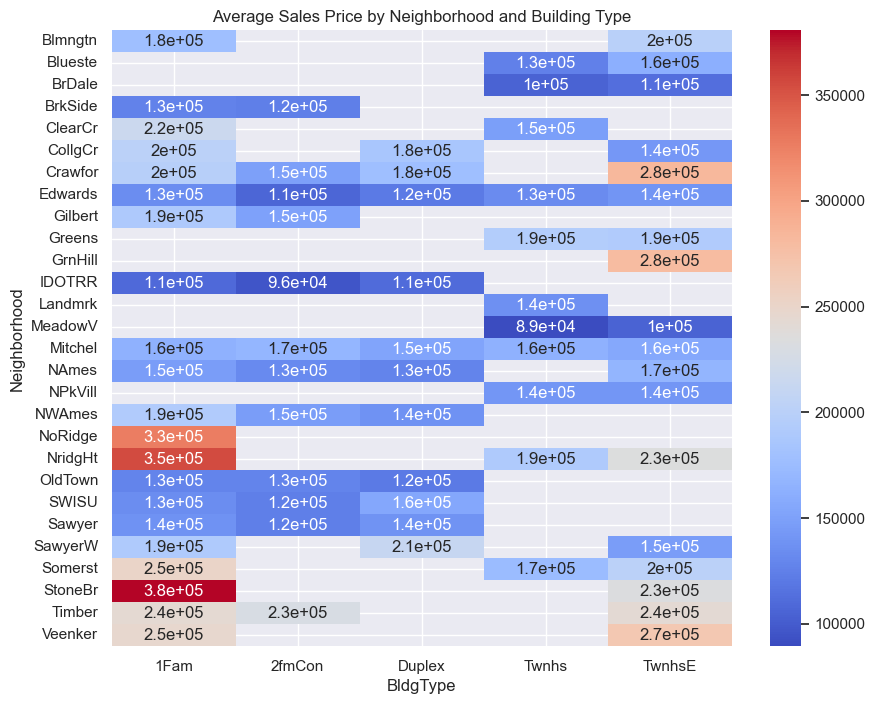

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average price per square foot for each neighborhood and building type
heatmap_data = data_raw.groupby(['Neighborhood', 'BldgType'])['SalePrice'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title('Average Sales Price by Neighborhood and Building Type')
plt.show()


**Price per Square Foot gives us a better sense**

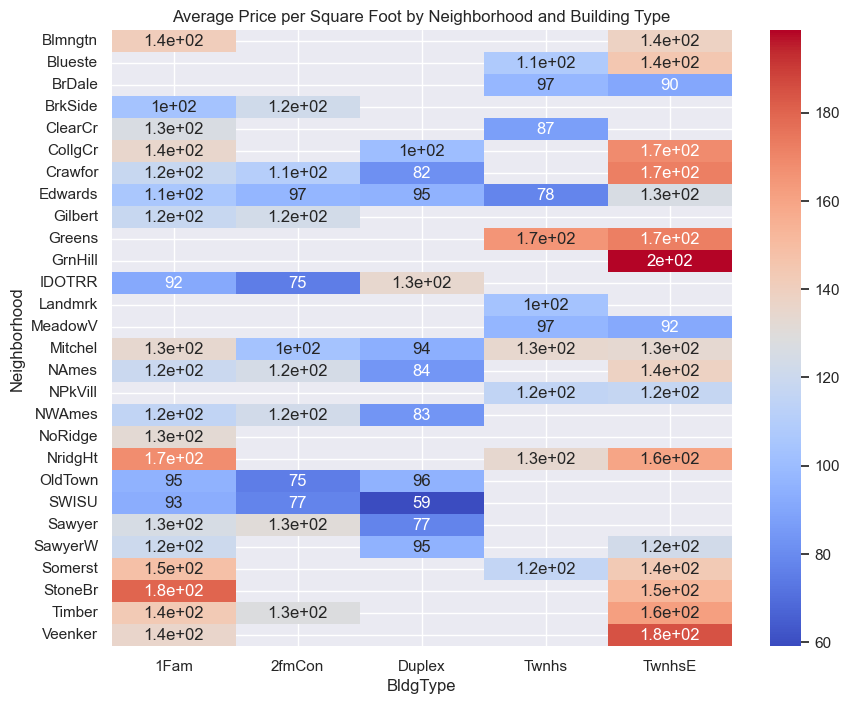

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate average price per square foot for each neighborhood and building type
heatmap_data = data_raw.groupby(['Neighborhood', 'BldgType'])['price_per_sqft'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title('Average Price per Square Foot by Neighborhood and Building Type')
plt.show()


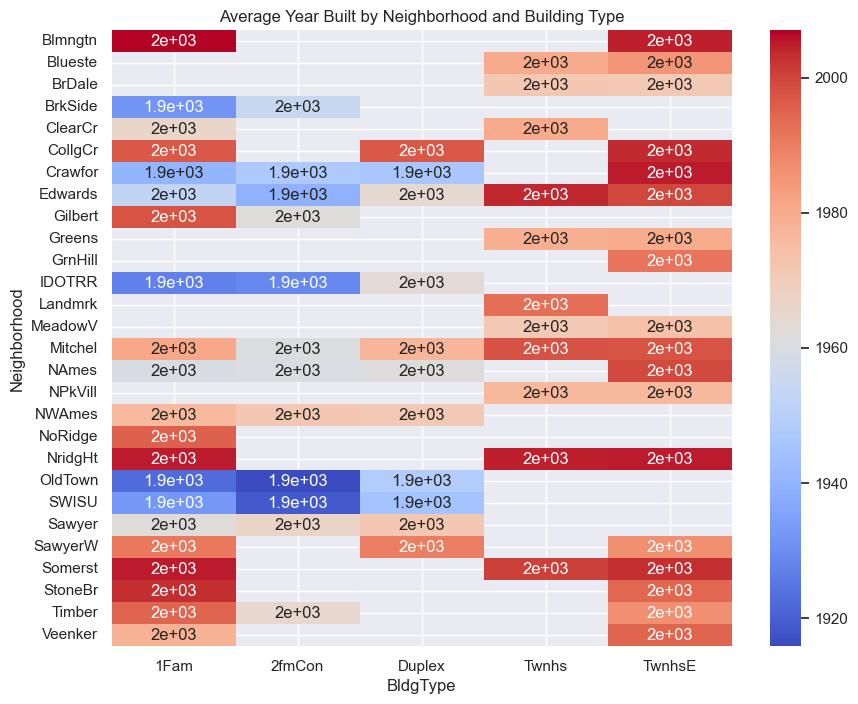

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate average price per square foot for each neighborhood and building type
heatmap_data = data_raw.groupby(['Neighborhood', 'BldgType'])['YearBuilt'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title('Average Year Built by Neighborhood and Building Type')
plt.show()


**How has the PPSF Changed?**

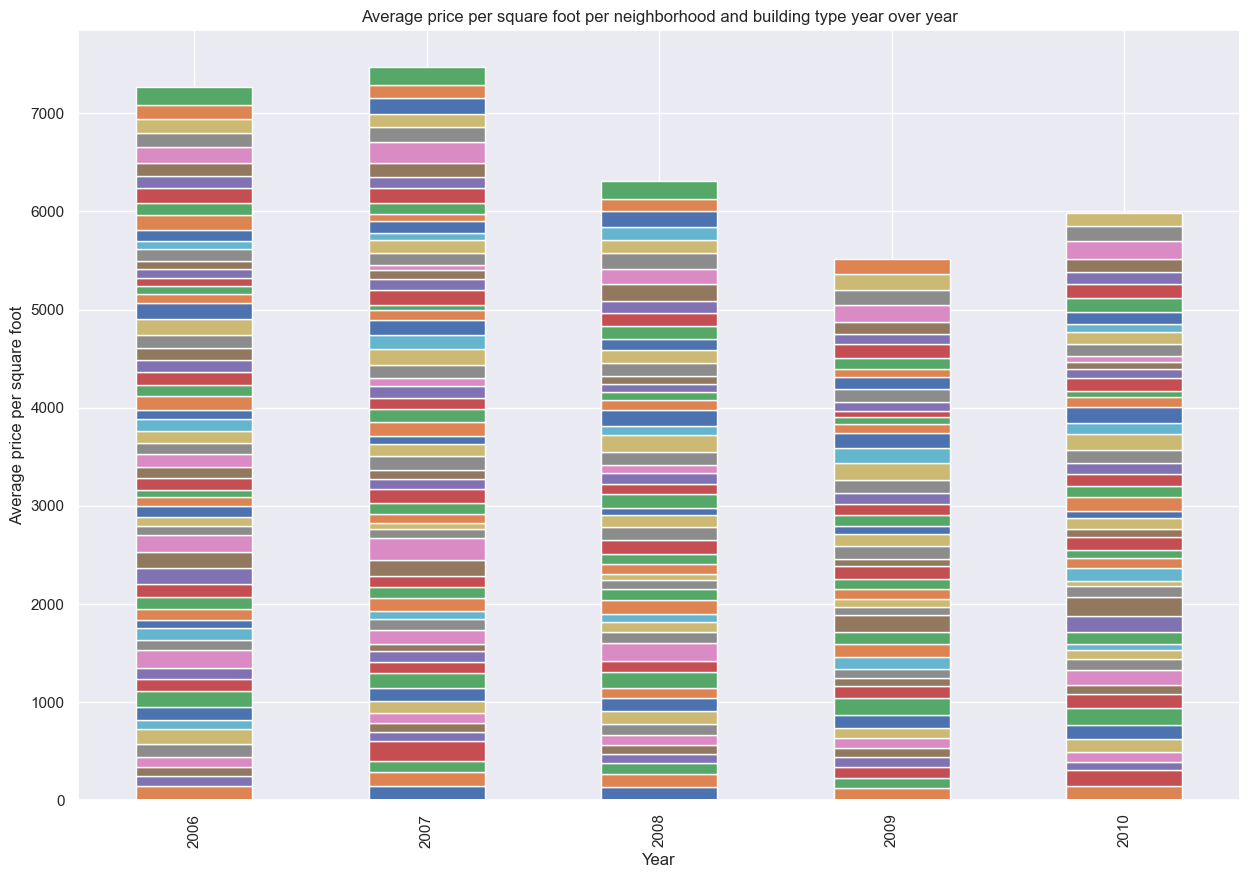

In [365]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new column for price per square foot
data_raw['price_per_sqft'] = data_raw['SalePrice'] / data_raw['GrLivArea']

# Group by neighborhood, building type, and year, and calculate average price per square foot
avg_price_per_sqft = data_raw.groupby(['Neighborhood', 'BldgType', 'YrSold'])['price_per_sqft'].mean().reset_index()

# Pivot the data for easier plotting
pivot_avg_price_per_sqft = avg_price_per_sqft.pivot(index='YrSold', columns=['Neighborhood', 'BldgType'], values='price_per_sqft')

# Plot the data
pivot_avg_price_per_sqft.plot(kind='bar', stacked = True, legend = False,figsize=(15, 10))

# Set the title and labels
plt.title('Average price per square foot per neighborhood and building type year over year')
plt.xlabel('Year')
plt.ylabel('Average price per square foot')

# Show the plot
plt.show()


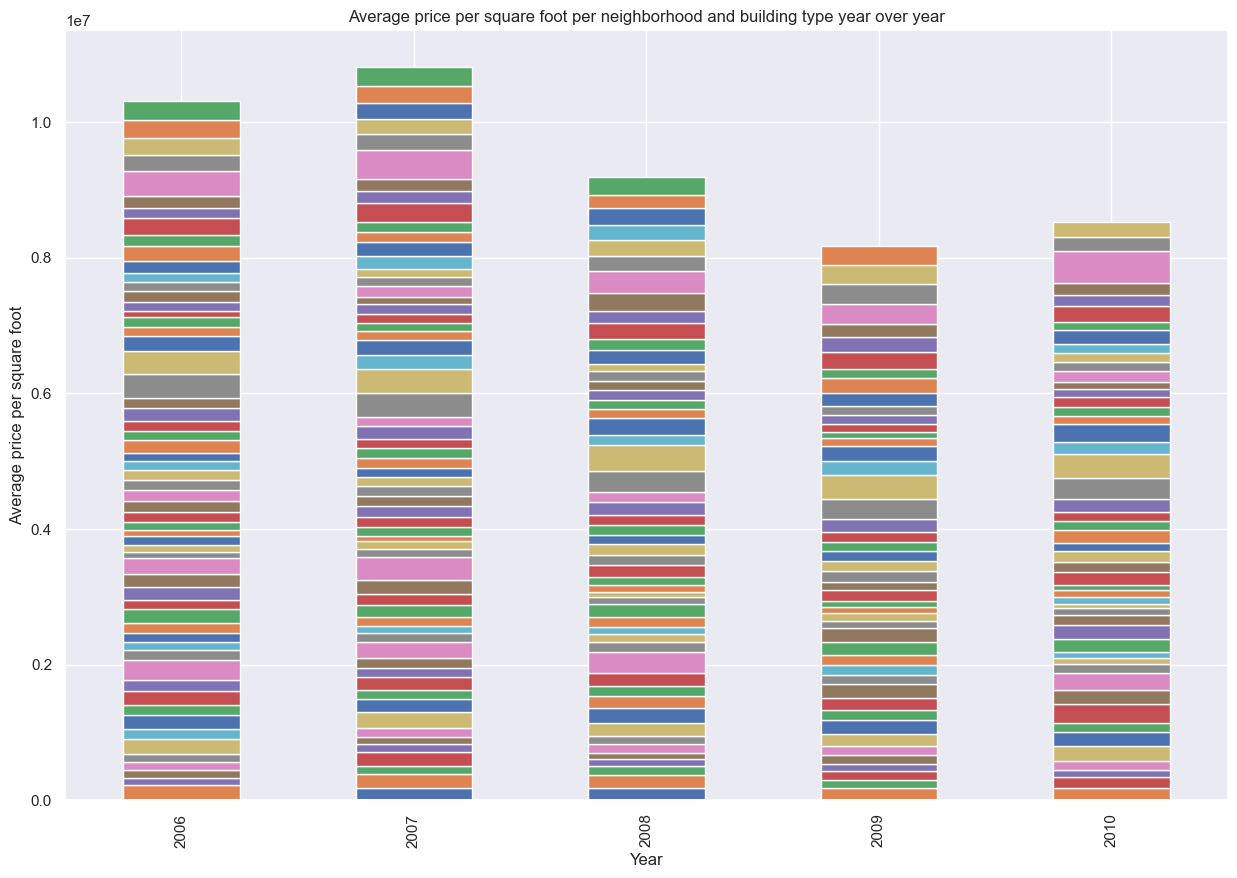

In [366]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by neighborhood, building type, and year, and calculate average price per square foot
avg_price_per_sqft = data_raw.groupby(['Neighborhood', 'BldgType', 'YrSold'])['SalePrice'].mean().reset_index()

# Pivot the data for easier plotting
pivot_avg_price_per_sqft = avg_price_per_sqft.pivot(index='YrSold', columns=['Neighborhood', 'BldgType'], values='SalePrice')

# Plot the data
pivot_avg_price_per_sqft.plot(kind='bar', stacked = True, legend = False,figsize=(15, 10))

# Set the title and labels
plt.title('SalePrice per neighborhood and building type year over year')
plt.xlabel('Year')
plt.ylabel('Average price per square foot')

# Show the plot
plt.show()


**Checking for Price Outliers**

In [368]:
# I'm not so worried about this as a high price
# familiarity with real estate in general, this doesn't seem crazy
data_raw['SalePrice'].max()

755000

In [369]:
# $12,789 seems super low, what are the conditions
data_raw['SalePrice'].min()

12789

In [370]:
# We see this row is abnormal
data_raw[data_raw['SalePrice'] == 12789]

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
427         428  902207130        832      12789          30       RM   

     LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
427         68.0     9656   Pave   Unk      Reg         Lvl    AllPub   

    LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
427    Inside       Gtl      OldTown       Norm       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
427     1Story            2            2       1923          1970     Gable   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
427  CompShg     AsbShng     AsbShng       None         0.0        TA   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
427        Fa     BrkTil       Fa       Fa           No          Unf   

     BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
427         0.0          Unf         0.0      678.0        678.0    GasA   

    HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
427        TA          N      SBrkr       832         0             0   

     BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
427           0.0           0.0         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
427             1          TA             5        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
427          Gd     Detchd       1928.0          Unf         2.0       780.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
427         Fa         Fa          N           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
427          0            0         0    Unk   Unk         Unk        0   

     MoSold  YrSold SaleType SaleCondition  SoldDate  price_per_sqft  
427       6    2010      WD        Abnorml   2010.06       15.371394

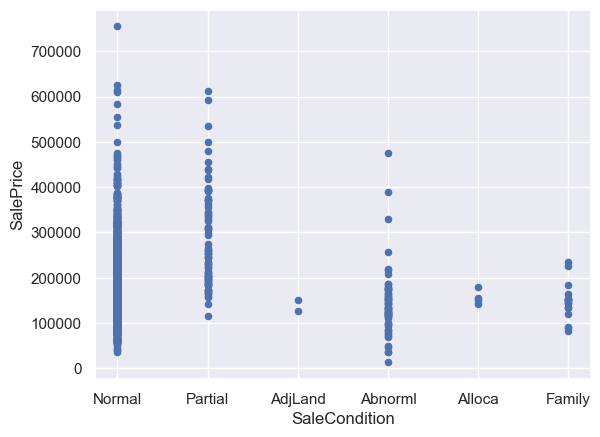

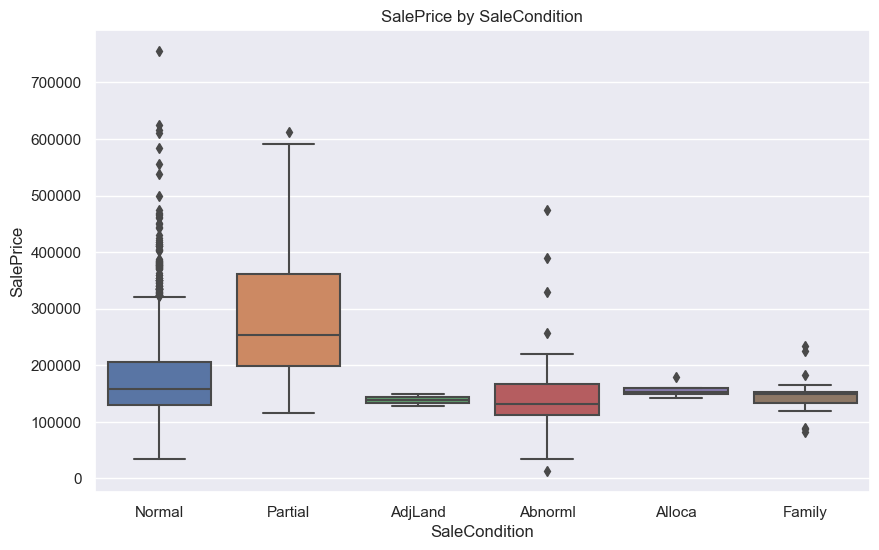

In [49]:
data_raw.plot.scatter(x='SaleCondition', y='SalePrice')

plt.figure(figsize=(10, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=data_raw)
plt.title('SalePrice by SaleCondition')
plt.show()

In [50]:
data_raw.SaleCondition.value_counts()

Normal     2414
Partial      82
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: SaleCondition, dtype: int64

In [51]:
# Calculate counts
sale_condition_counts = data_raw['SaleCondition'].value_counts()

# Calculate percentages
sale_condition_percent = data_raw['SaleCondition'].value_counts(normalize=True) * 100

# Create a new DataFrame
sale_condition_df = pd.DataFrame({
    'Count': sale_condition_counts,
    'Percent': sale_condition_percent
})

sale_condition_df


Count    Percent
Normal    2414  93.565891
Partial     82   3.178295
Abnorml     61   2.364341
Family      17   0.658915
Alloca       4   0.155039
AdjLand      2   0.077519

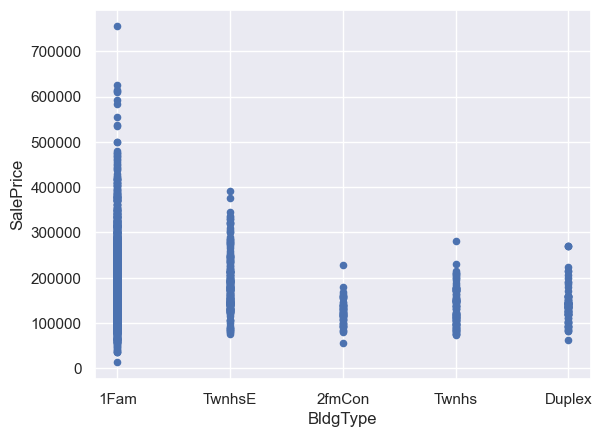

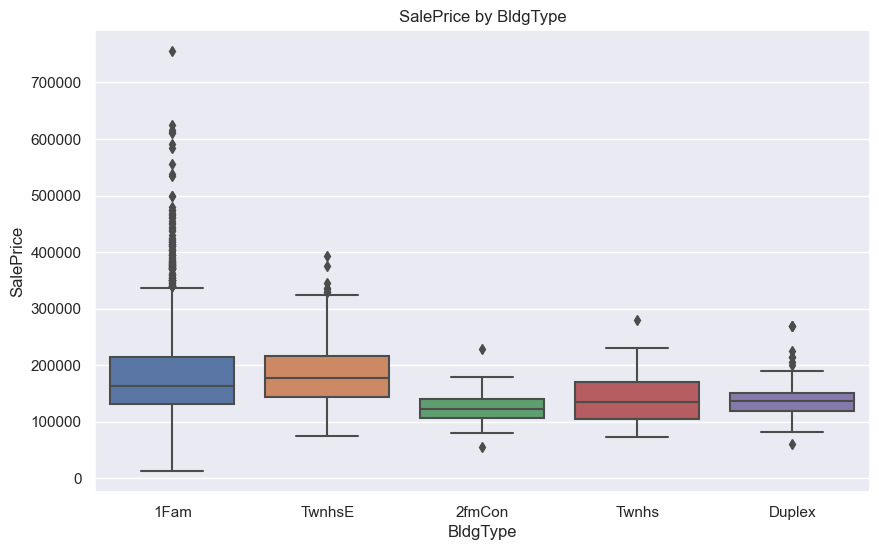

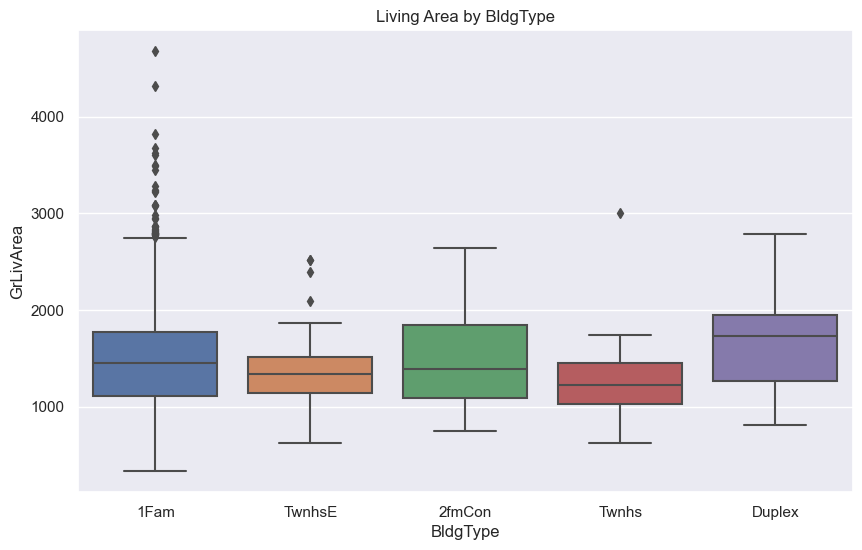

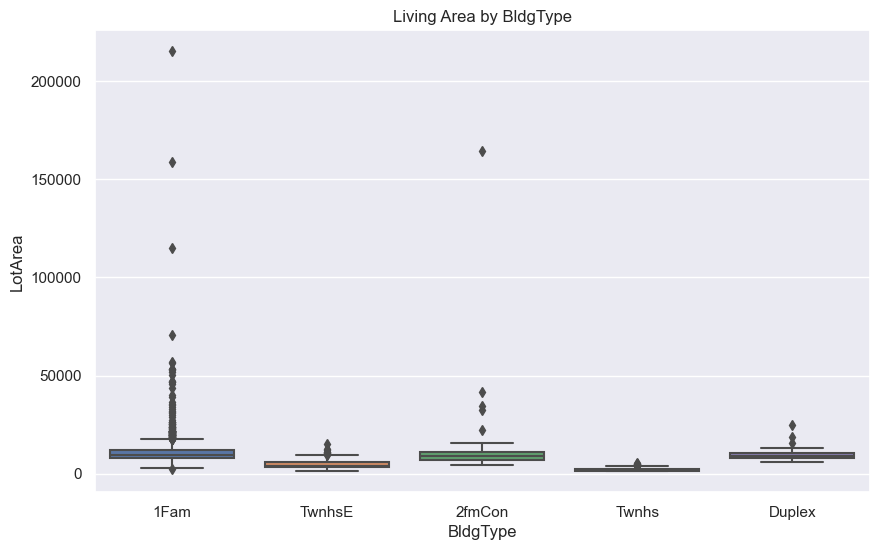

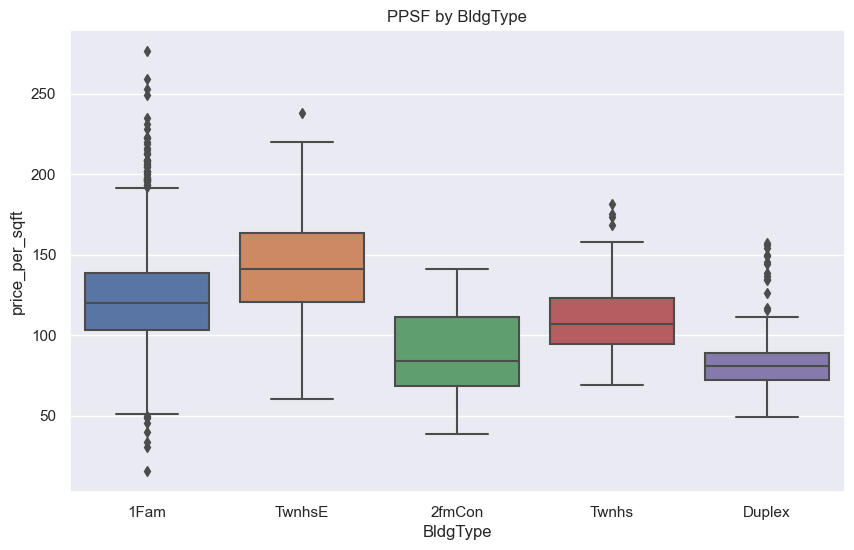

/var/folders/6k/0v57cgbd2k37vp0lh44zby640000gn/T/ipykernel_1971/298160327.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[['SalePrice', 'GrLivArea']] = scaler.fit_transform(data_filtered[['SalePrice', 'GrLivArea']])


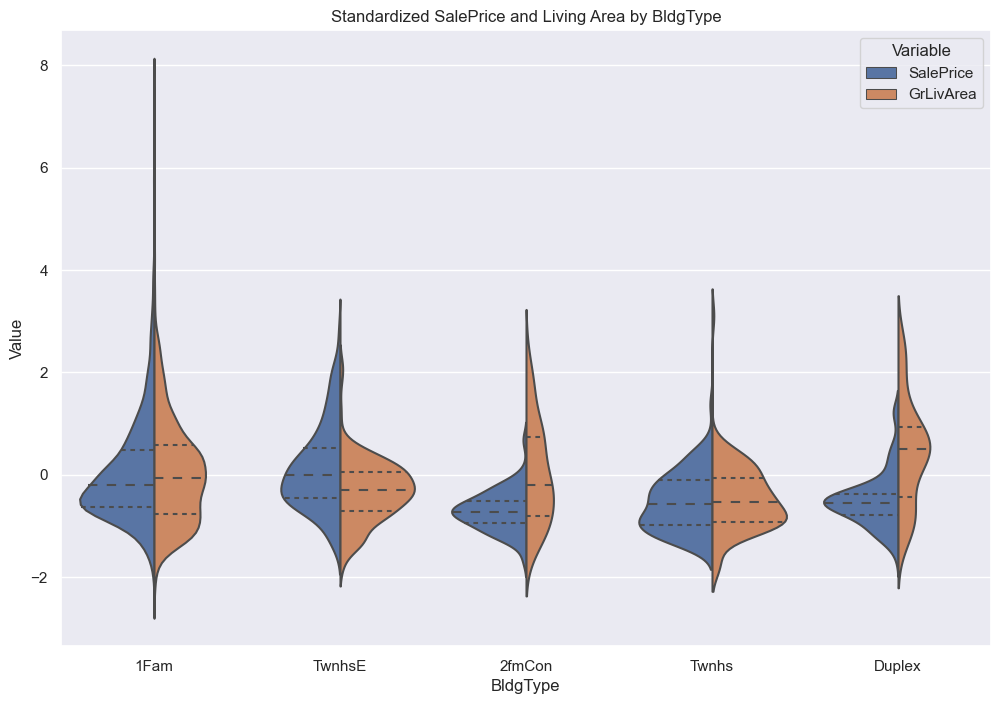

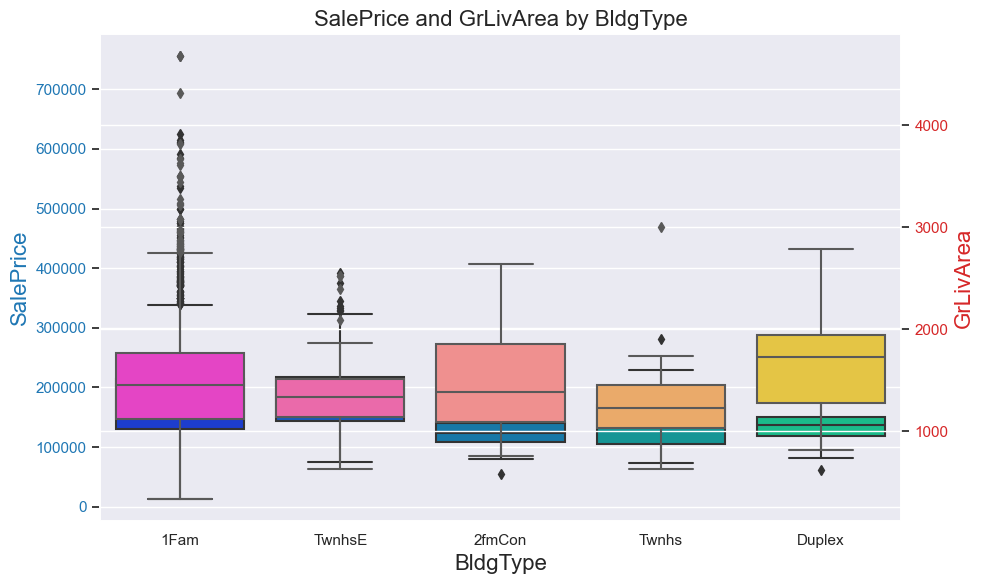

In [65]:
data_raw.plot.scatter(x='BldgType', y='SalePrice')

plt.figure(figsize=(10, 6))
sns.boxplot(x='BldgType', y='SalePrice', data=data_raw)
plt.title('SalePrice by BldgType')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='BldgType', y='GrLivArea', data=data_raw)
plt.title('Living Area by BldgType')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='BldgType', y='LotArea', data=data_raw)
plt.title('Lot Area by BldgType')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='BldgType', y='price_per_sqft', data=data_raw)
plt.title('PPSF by BldgType')
plt.show()

from sklearn.preprocessing import StandardScaler

# Filter the data
data_filtered = data_raw[['BldgType', 'SalePrice', 'GrLivArea']]

# Standardize 'SalePrice' and 'GrLivArea'
scaler = StandardScaler()
data_filtered[['SalePrice', 'GrLivArea']] = scaler.fit_transform(data_filtered[['SalePrice', 'GrLivArea']])

# "Melt" the dataset to "long-form" representation
data_melted = data_filtered.melt(id_vars='BldgType', var_name='Variable', value_name='Value')

# Create a violinplot
plt.figure(figsize=(12, 8))
sns.violinplot(x='BldgType', y='Value', hue='Variable', split=True, inner='quart', data=data_melted)
plt.title('Standardized SalePrice and Living Area by BldgType')
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_title('SalePrice and GrLivArea by BldgType', fontsize=16)
ax1.set_xlabel('BldgType', fontsize=16)
ax1.set_ylabel('SalePrice', fontsize=16, color=color)
ax1 = sns.boxplot(x='BldgType', y='SalePrice', data=data_raw, palette='winter')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('GrLivArea', fontsize=16, color=color)
ax2 = sns.boxplot(x='BldgType', y='GrLivArea', data=data_raw, palette='spring')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()



In [52]:
# Calculate counts
sale_condition_counts = data_raw['BldgType'].value_counts()

# Calculate percentages
sale_condition_percent = data_raw['BldgType'].value_counts(normalize=True) * 100

# Create a new DataFrame
sale_condition_df = pd.DataFrame({
    'Count': sale_condition_counts,
    'Percent': sale_condition_percent
})

sale_condition_df


Count    Percent
1Fam     2139  82.906977
TwnhsE    202   7.829457
Twnhs      98   3.798450
Duplex     87   3.372093
2fmCon     54   2.093023

In [66]:
data_raw.sort_values('LotArea', ascending=False).head()

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
355   916176125       2036     375000          20       RL        150.0   
1634  916125425       1786     228950         190       RL          NaN   
249   906426060       2144     277000          50       RL          NaN   
1271  905301050       1824     302000          20       RL          NaN   
1955  906475200       1533     280000          20       RL         62.0   

      LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
355    215245   Pave   NaN      IR3         Low    AllPub    Inside       Sev   
1634   164660   Grvl   NaN      IR1         HLS    AllPub    Corner       Sev   
249    159000   Pave   NaN      IR2         Low    AllPub   CulDSac       Sev   
1271   115149   Pave   NaN      IR2         Low    AllPub   CulDSac       Sev   
1955    70761   Pave   NaN      IR1         Low    AllPub    Inside       Mod   

     Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
355        Timber       Norm       Norm     1Fam     1Story            7   
1634       Timber       Norm       Norm   2fmCon     1.5Fin            5   
249       ClearCr       Norm       Norm     1Fam     1.5Fin            6   
1271      ClearCr       Norm       Norm     1Fam     1Story            7   
1955      ClearCr       Norm       Norm     1Fam     1Story            7   

      OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
355             5       1965          1965       Hip  CompShg     BrkFace   
1634            6       1965          1965     Gable  CompShg     Plywood   
249             7       1958          2006     Gable  CompShg     Wd Sdng   
1271            5       1971          2002     Gable  CompShg     Plywood   
1955            5       1975          1975     Gable  WdShngl     Plywood   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
355      BrkFace       None         0.0        TA        TA     CBlock   
1634     Plywood       None         0.0        TA        TA     CBlock   
249      HdBoard     BrkCmn       472.0        Gd        TA     CBlock   
1271     Plywood      Stone       351.0        TA        TA     CBlock   
1955     Plywood       None         0.0        TA        TA     CBlock   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
355        Gd       TA           Gd          ALQ      1236.0          Rec   
1634       TA       TA           Gd          ALQ      1249.0          BLQ   
249        Gd       TA           Gd          Rec       697.0          Unf   
1271       Gd       TA           Gd          GLQ      1219.0          Unf   
1955       Gd       TA           Gd          ALQ       655.0          Unf   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
355        820.0       80.0       2136.0    GasW        TA          Y   
1634       147.0      103.0       1499.0    GasA        Ex          Y   
249          0.0      747.0       1444.0    GasA        Gd          Y   
1271         0.0      424.0       1643.0    GasA        TA          Y   
1955         0.0      878.0       1533.0    GasA        TA          Y   

     Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
355       SBrkr      2036         0             0           2.0           0.0   
1634      SBrkr      1619       167             0           2.0           0.0   
249       SBrkr      1444       700             0           0.0           1.0   
1271      SBrkr      1824         0             0           1.0           0.0   
1955      SBrkr      1533         0             0           1.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
355          2         0             3             1          TA   
1634         2         0             3             1          TA   
249          2         0             4             1          Gd   
1271         2         0             2          

In [67]:
data_raw.MSSubClass.value_counts()

20     939
60     502
50     259
120    169
30     123
160    120
70     116
80     109
90      87
190     53
85      43
75      21
45      17
180     15
40       6
150      1
Name: MSSubClass, dtype: int64

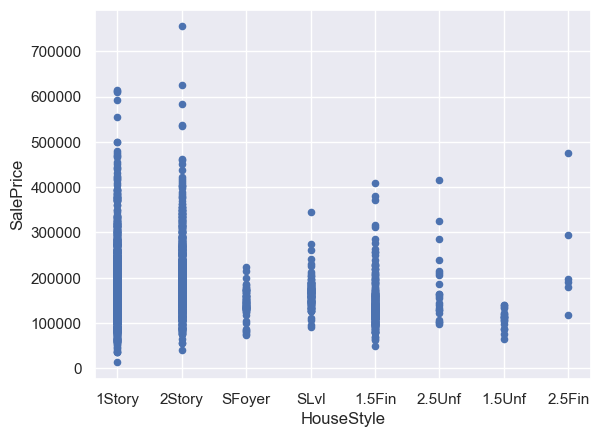

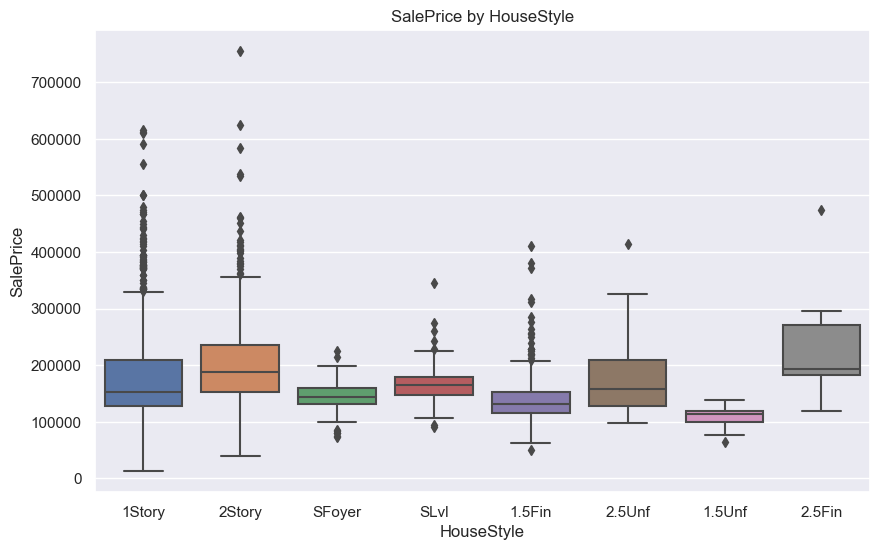

In [377]:
data_raw.plot.scatter(x='HouseStyle', y='SalePrice')

plt.figure(figsize=(10, 6))
sns.boxplot(x='HouseStyle', y='SalePrice', data=data_raw)
plt.title('SalePrice by HouseStyle')
plt.show()

In [68]:
# Calculate counts
sale_condition_counts = data_raw['HouseStyle'].value_counts()

# Calculate percentages
sale_condition_percent = data_raw['HouseStyle'].value_counts(normalize=True) * 100

# Create a new DataFrame
sale_condition_df = pd.DataFrame({
    'Count': sale_condition_counts,
    'Percent': sale_condition_percent
})

sale_condition_df


Count    Percent
1Story   1288  49.922481
2Story    773  29.961240
1.5Fin    284  11.007752
SLvl      118   4.573643
SFoyer     70   2.713178
2.5Unf     22   0.852713
1.5Unf     19   0.736434
2.5Fin      6   0.232558

# Data Exploration

- Try removing all but Normal Sales

In [ ]:
# Abnormal Sale -  trade, foreclosure, short sale
# Family - Sale between family members
# Partial - Home Not Completed at Last Assemessment --> Unfinished new home (usually sold at a discount)
# I'm going to take these out because these aren't the types of 
# homes where price predictions are meaningful
# And in the case the buyer or seller would want a prediction for these homes
# They'd want the potential free-market value, not discounted.
data_raw.SaleCondition.value_counts()

<Axes: >

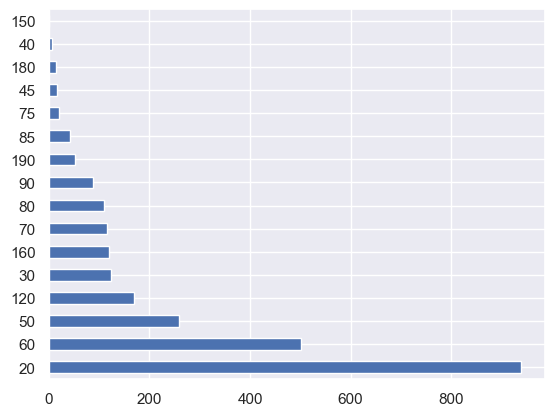

In [391]:
data_raw.MSSubClass.value_counts().plot.barh()

In [380]:
# Probably where new developments are happening
data_raw[data_raw['SaleCondition'] == 'Partial'].groupby('Neighborhood')['SaleCondition'].value_counts()


Neighborhood  SaleCondition
Blmngtn       Partial           4
CollgCr       Partial           7
Crawfor       Partial           1
Edwards       Partial           3
Gilbert       Partial           8
NridgHt       Partial          20
OldTown       Partial           1
SawyerW       Partial           2
Somerst       Partial          27
StoneBr       Partial           8
Timber        Partial           1
Name: SaleCondition, dtype: int64

In [69]:
data_raw[data_raw['SaleCondition'] == 'Abnorml'].groupby('Neighborhood')['SaleCondition'].value_counts()


Neighborhood  SaleCondition
BrDale        Abnorml           2
BrkSide       Abnorml           3
ClearCr       Abnorml           2
CollgCr       Abnorml           3
Crawfor       Abnorml           1
Edwards       Abnorml           4
Gilbert       Abnorml           1
IDOTRR        Abnorml           7
Mitchel       Abnorml           3
NAmes         Abnorml          12
NWAmes        Abnorml           3
NridgHt       Abnorml           1
OldTown       Abnorml           7
SWISU         Abnorml           1
Sawyer        Abnorml           4
SawyerW       Abnorml           4
Somerst       Abnorml           2
Timber        Abnorml           1
Name: SaleCondition, dtype: int64

In [ ]:
print('Num of Outliers:', len(outliers))
print('% of Total:', (len(outliers) / len(data_raw)) * 100)
outliers

In [ ]:
## Outliers

**Lot Area**

In [395]:
Q1 = data_raw['LotArea'].quantile(0.25)
Q3 = data_raw['LotArea'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 5 * IQR
upper_bound = Q3 + 5 * IQR

# Identify outliers
outliers = data_raw[(data_raw['LotArea'] < lower_bound) | (data_raw['LotArea'] > upper_bound)]


In [396]:
print('Num of Outliers:', len(outliers))
print('% of Total:', (len(outliers) / len(data_raw)) * 100)
outliers

Num of Outliers: 27
% of Total: 1.0465116279069768


Unnamed: 0         PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
104          105   906426195       1953     240000          60       RL   
186          187   903425190       2486     220000          50       RM   
195          196   905401060       1663     256000          20       RL   
249          250   906426060       2144     277000          50       RL   
309          310   908154205       4676     184750          60       RL   
329          330   905425125       2358     240000          50       RL   
347          348   533350050       1842     385000          20       RL   
355          356   916176125       2036     375000          20       RL   
369          370   923205025       1622     168000         190       RL   
527          528   527226040       1424     155000         190       RL   
568          569  1007100110       1836     103000          70  I (all)   
615          616   527216080       2338     591587          20       RL   
802          803   527216070       3279     538000          60       RL   
844          845   527276040       1488     133000          20       RL   
1049          50   906426090       1582     190000          20       RL   
1069          70   923229140       1676     196000          20       RL   
1178         179   528390100       2448     402000          60       RL   
1271         272   905301050       1824     302000          20       RL   
1325         326   528320060       3627     625000          60       RL   
1422         423   905401045       1363     241500          20       RL   
1634         635   916125425       1786     228950         190       RL   
1793         794   527250040       1056     145000         190       RL   
1955         139   906475200       1533     280000          20       RL   
2008         192   923202220       2034     130000          20       RL   
2172         356   916125360       1687     160000          20       RL   
2210         394   917425190       1572     186700          20       RL   
2308         492   908154080       3820     284700          20       RL   

      LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
104           0.0    53107   Pave   Unk      IR2         Low    AllPub   
186          90.0    33120   Pave   Unk      IR3         Lvl    AllPub   
195           0.0    53227   Pave   Unk      IR1         Low    AllPub   
249           0.0   159000   Pave   Unk      IR2         Low    AllPub   
309         130.0    40094   Pave   Unk      IR1         Bnk    AllPub   
329          75.0    45600   Pave   Unk      IR2         Bnk    AllPub   
347          68.0    50271   Pave   Unk      IR1         Low    AllPub   
355         150.0   215245   Pave   Unk      IR3         Low    AllPub   
369           0.0    32463   Pave   Unk      Reg         Low    AllPub   
527         195.0    41600   Pave   Unk      IR1         Lvl    AllPub   
568           0.0    56600   Pave   Unk      IR1         Low    AllPub   
615          52.0    51974   Pave   Unk      IR1         Lvl    AllPub   
802          47.0    53504   Pave   Unk      IR2         HLS    AllPub   
844           0.0    47280   Pave   Unk      IR1         Lvl    AllPub   
1049          0.0    36500   Pave   Unk      IR1         Low    AllPub   
1069         61.0    33983   Pave   Unk      IR1         Lvl    AllPub   
1178         52.0    46589   Pave   Unk      IR2         Lvl    AllPub   
1271          0.0   115149   Pave   Unk      IR2         Low    AllPub   
1325        118.0    35760   Pave   Unk      IR1         Lvl    AllPub   
1422         73.0    39104   Pave   Unk      IR1         Low    AllPub   
1634          0.0   164660   Grvl   Unk      IR1         HLS    AllPub   
1793        100.0    34650   Pave   Unk      Reg         Bnk    AllPub   
1955         62.0    70761   Pave   Unk      IR1         Low    AllPub   
2008        200.0    43500   Pave   Unk      Reg         Lvl    AllPub   
2172          0.0    57200   Pave   Unk      IR1       

In [397]:
outliers.Neighborhood.value_counts()

ClearCr    8
Timber     4
Mitchel    3
Gilbert    3
Edwards    2
StoneBr    2
NoRidge    2
OldTown    1
Veenker    1
IDOTRR     1
Name: Neighborhood, dtype: int64

In [398]:
outliers.SaleCondition.value_counts()

Normal     24
Partial     2
Family      1
Name: SaleCondition, dtype: int64

**GO OVER**

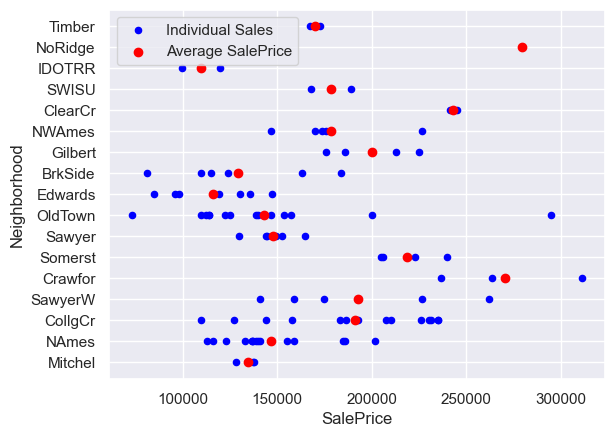

In [70]:
# Filter the DataFrame for rows where 'OverallQual' equals a certain number
filtered_data = data_raw[((data_raw['OverallQual'] == 7) | (data_raw['OverallQual'] == 5))   & 
                         (data_raw['BldgType'] == '1Fam') &
                         (data_raw['YrSold'] == 2008)     &
                         (data_raw['MoSold'].between(4, 6)) &  # This line has been updated
                         (data_raw['SaleCondition'] == 'Normal')
                        ]

# Calculate the average 'SalePrice' per 'Neighborhood'
average_prices = filtered_data.groupby('Neighborhood')['SalePrice'].mean()

# Create the scatter plot
filtered_data.plot.scatter(x='SalePrice', y='Neighborhood', color='blue', label='Individual Sales')
plt.scatter(x=average_prices, y=average_prices.index, color='red', label='Average SalePrice')
plt.legend()
plt.show()

In [412]:
imbalance_threshold = 0.90  # adjust this as needed

imbalance_list = []  # list to store the results

# iterate over columns in the DataFrame
for column in data_raw.columns:
    # get value counts normalized
    value_counts = data_raw[column].value_counts(normalize=True)
    
    # get the value with the highest count
    max_value_count = value_counts.iloc[0]
    
    if max_value_count > imbalance_threshold:
        imbalance_list.append((column, value_counts.index[0], round(max_value_count * 100, 2)))

# sort the list by the percentage in descending order
imbalance_list.sort(key=lambda x: x[2], reverse=True)

# print the sorted results
for column, max_value, percentage in imbalance_list:
    print(f'{column} {max_value} at {percentage}%')


# Data Cleaning

List of Selected Features
- 'GrLivArea',Neighborhood, LotArea, LotFrontage, LandSlope,OverallQual,OverallCond,(FullBath,HalfBath),1stFlrSF,(Condition1,Condition2),

- MiscCondition: Remove All
- Remove Qualities, Remove Conditions,
- Split by Year/Month as well?

Rolling Windows
- By Neighborhood, 3 month rolling windows
- By House Type, By Neighbordhood 3 month rolling windows
- Segregate by Neighborhood and Re-Run Models? Count 

Impact Checking
-- Remove Unfinished Houses (HouseStyle)
- Remove non-normal Sale Conditions
- What is the impact of removing quality 
- What is the impact of removing condition
- What if we removed unfinished properties
- What are the values of 2Fams?
- What neighborhoods are they in?
- How does year built affect ppsf
- Aggregate porches

DONE
- Price per square foot --> average ppsf per Neighborhood per OverallQual

Improvable Features:
- Quality
- Condition